<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Big-Assignment/FaceMask_Classification_MobileNetV2/Big_Assignment_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <b> CS114.L21: MACHINE LEARNING <center> <h1> <b>

<center> <h2> <b> ĐỒ ÁN CUỐI KỲ: PHÂN LOẠI MANG KHẨU TRANG SỬ DỤNG MOBILENETV2 <center> <h> <b>

#**I. GIỚI THIỆU**



##**1. Giảng viên hướng dẫn**
1. Thầy Nguyễn Đình Duy
2. Thầy Phạm Nguyễn Trường An

##**2. Thành viên nhóm**

* 19522246 - Vũ Nguyễn Nhật Thanh
* 19522180 - Trương Thế Tấn
* 19521551 - Nông Thanh Hồng

##**3. Lý do chọn đề tài**

Năm 2020, 2021 thế giới nói chung và Việt Nam nói riêng đã có nhiều thay đổi khi đối mặt với dịch bệnh Covid - 19.  Theo số liệu từ [Tổ chức Y tế Thế giới - WHO](https://covid19.who.int/), tính đến 5:55pm CEST, 13-7-2021 *(Theo giờ Châu Âu)*, tức là vào 20:55 ngày 13-7-2021 ở Việt Nam thì tổng số ca nhiềm Covid-19 trên thế giới đạt mốc là 187,086,096 ca, trong đó có 4,042,921 ca tử vong. Trong khi ở Việt Nam tính tới 12:00 trưa ngày 14-7-2021 là đã có tổng 30,477 ca nhiễm, đang điều trị 21,823 ca, khỏi 8,520 ca; tử vong 130 ca (theo số liệu [bộ Y tế](https://ncov.moh.gov.vn/))*. 

Thời gian gần đây *(cụ thể tính từ 27-4-2021)* Việt Nam có số ca nhiễm tăng vọt, với những điểm nóng là Bắc Giang *(đã giải quyết)* và kỉ lục trong những ngày của tháng bảy đang thuộc với Tp. Hồ Chí Minh với số ca nhiễm tăng nhanh và diễn biến khó lường *(trong ngày 12/7 số ca nhiễm hơn 1,700 ca)*. Không chỉ có Việt Nam, các quốc gia trên thế giới cũng đang đối mặt với việc bùng phát dịch mới như:  Brazil (48,503 ca),Ấn Độ (37,154 ca), Indonesia (40,423 ca), Anh (31,352 ca), Mỹ (8,224 ca),... *(số ca nhiễm mới trong vòng 24h theo số liệu từ [WHO](https://covid19.who.int/) ngày 13/7 ở Việt Nam)*.

Với sự nhất quán trong việc thực hiện những quy định đã được đề ra ban đầu, cộng với đó là thông điệp 5K và phương châm mới "5K + vắc xin" Việt Nam tự tin có thể vượt qua đợt dịch lần này. Bên cạnh đó, sẽ hiệu quả, nhanh chóng trong công tác kiểm soát dịch bệnh nếu mỗi người dân thực hiện, chấp hành nghiêm chỉnh biện pháp 5K, trong đó, việc bắt buộc mang khẩu trang là một trong những điều tiên quyết mà người dân cần thực hiện.

Tuy nhiên, việc mang khẩu trang sẽ không có tác dụng nếu như chúng ta mang sai cách. Để đảm bảo việc thực hiện đúng quy định mang khẩu trang và mang một cách hiệu quả thì nhóm em hướng tới tận dụng sự phát triển của Machine Learning trong việc nhận diện người không mang khẩu trang hoặc mang khẩu trang sai cách. Mô hình sẽ được ứng dụng ở các tòa nhà, cửa hàng,... nơi có nhiều người ra vào. Thông qua việc đặt camera (hoặc tận dụng nếu phù hợp) trước các cửa ra vào, mô hình sẽ cảnh báo được người đang không mang hoặc mang khẩu trang sai cách. Góp phần giúp họ điều chỉnh, thực hiện tốt quy định, đồng thời giúp các nhân viên an ninh kiểm soát tốt việc thực hiện đúng quy định. 

#**II. MÔ TẢ BÀI TOÁN VÀ BỘ DỮ LIỆU**

##**1. input, output**

Nhóm em sử dụng mô hình caffe được xây dựng sẵn để nhận diên ra các khuôn mặt, các khuôn mặt đó sẽ được đưa vào mô hình phân loại mà nhóm em xây dựng và dự đoán là khuôn mặt đó đang đeo khẩu trang đúng cách, đeo khẩu trang sai cách hay không đeo khẩu trang.
- input: một tensor có kích thước (224, 224, 3), tensor này ứng với một bức ảnh có kích thước (224, 224) và có 3 kênh màu là Red, Green, Blue.
- output: một mảng số thực có kích thước (1,3) ứng với 3 xác suất, mỗi xác suất đại diện cho khả năng mà bức hình có nhãn thuộc về một lớp.

##**2. Mô tả bộ dữ liệu**

Nhóm em tiến hành xây dựng bộ dữ liệu dựa trên các đặc điểm môi trường mà mô hình có thể gặp trong thực tế ứng với ngữ cảnh mà nhóm em hướng tới, dữ liệu không có sẵn, nên nhóm em tiến hành thu thập dữ liệu từ các bức ảnh lớn, sau đó tiến hành cắt và phân loại nhãn. Các bức ảnh lớn được nhóm thu thập phải có những đặc điểm sau:
  + Điều kiên ánh sáng: ánh sáng mặt trời, các bóng râm, ánh sáng trắng từ các bóng đèn trên trần của toà nhà hoặc từ các bóng đèn treo trước cửa các cửa hàng, không có các ảnh trong bóng tối hay trong các buổi đêm không có đèn.
  + Đặc điểm khuôn mặt: khuôn mặt của các bức hình lớn khi phóng to phải ở mức có thể nhìn ra được, khuôn mặt không bị che bởi các vật khác, khuôn mặt đang hướng về phía camera, đang nhìn thẳng, quay trái, quay phải hoặc hơi cúi.
  + Background của các bức hình lớn là những hình ảnh liên quan đến các khung cảnh có thể gặp ngoài trời như cây cối, con người, mặt đường, tòa nhà, xe cộ.
  + Điều kiện thời tiết: thời tiết trong các bức hình lớn bao gồm những điều kiện thời tiết ngoài trời có thể có như nắng, mưa, có gió.
  + Góc chụp: các bức hình lớn được chụp từ camera có độ cao cách mặt đất từ 2 đến 2.5m, với góc chụp 60 độ khi hợp với phương thẳng đứng.

Các khuôn mặt trong bức hình lớn sẽ được cắt ra thành các khung hình vuông hoặc hình chữ nhật, các khung hình này bao trọn toàn bộ khuôn mặt, các khuôn mặt này sẽ được sử dụng để làm dữ liệu huấn luyện cho mô hình phân loại.

Số lượng: Mô hình có số lớp dự đoán là 3, và mỗi nhãn có 1200 bức ảnh khuôn mặt đã được cắt từ các bức hình lớn, dữ liệu có sự đa dạng như sau:
  + các khuôn mặt trong bức ảnh đang nghiêng đầu, quay đầu sang trái hoặc phải, nhìn về phía trước, nhìn thẳng vào camera
  + các khuôn mặt được chụp trong điều kiện ánh sáng ban ngày ngoài trời hoặc từ các ánh sáng trắng từ các bóng đèn treo trước cửa hàng hay
  + các bóng đèn trên trần nhà, các bức hình được chụp từ camera dưới góc chụp 60 độ kết hợp với phương thẳng đứngđứng. 
  
Tổng số lượng bức hình của cả 3 nhãn là 3600 bức ảnh, nhóm sử dụng thêm phương thức ImageDataGenerator() để tăng thêm số lượng ảnh huấn luyện cho mô hình phân loại.

Các bức ảnh khuôn măth trước khi đưa vô mô hình để huấn luyện sẽ được resize lại kích thước thành 224*224.

Do số lượng dữ liệu không đủ lớn, nên nhóm em chia tỉ lệ của dữ liệu với kích thước 70-15-15 cho các tập train, test, validation.
  + 70% dữ liệu của từng nhãn sẽ được dùng cho tập train.
  + 15% dữ liệu của từng nhãn sẽ được dùng cho tập validation.
  + 15% dữ liệu của từng nhãn sẽ được dùng cho tập test.

##**3. Mô tả đặc trưng**

Feature engineering: Do dữ liệu của mô hình là những bức ảnh nên nhóm em đề xuất ra 2 dạng đặc trưng sau:
  + Ma trận 2 chiều
  + Tensor 

Bức ảnh nếu được chuyển qua mảng 2 chiều thì sẽ là những ảnh trắng đen, nếu bức ảnh có màu trắng đen thì nó sẽ chiu ảnh hưởng lớn bởi ánh sáng bên ngoài và độ sáng của vật thê trong bức hình, nếu bức hình được chụp trong điều hiện ánh sáng yếu hoặc có bóng râm che, khi chuyển bức hình qua ảnh trắng đen thì nó sẽ có nhiều điểm ảnh tối hơn. Ngược lại nếu bức ảnh chụp trong điều kiện ánh sáng quá chói, khi chuyển bức hình qua ảnh trắng đen thì nó sẽ chứa nhiều điểm ảnh trắng. 

Bức ảnh được chuyến qua dạng tensor sẽ có được rất nhiều thông tin về bức hình, do có nhiều ma trận biểu diễn cho một đặc điểm của bức ảnh, khi đó sẽ giữ lại được nhiều thông tin quan trọng của bức ảnh gốc và giúp cho mô hình phân loại có độ chính xác tốt hơn.

Dữ liệu thực tế sẽ được thu lại thông qua camera, ta tiến hành cắt từng frame mà camera thu được rồi đưa vào mô hình nhận diện khuôn mặt, mô hình sẽ phát hiện và tìm ra 4 tọa độ của từng khuôn mặt khi đó ta sẽ căt được các khuôn mặt trong bức hình, các tấm ảnh khuôn mặt này sau đó được đưa vào mô hình dưới dạng các tensor để tiến hành phân loại và dự đoán nhãn. 

#**III. ĐÁNH GIÁ, NHẬN XÉT**


##**1. Đánh giá về mô hình của nhóm**

##**2. So sánh với mô hình khác**

Mô hình của nhóm em được tạo nên từ nhiều bài viết, mỗi bài viết là một ý tưởng để nhóm thực hiện hóa trên mô hình của nhóm mình. Và đó là mô hình của nhóm tự xây dựng trên tập dữ liệu của nhóm thu thập được. Vậy vẫn sử dụng tập mô hình của nhóm trên một mô hình khác, môt mô hình pre-train thì kết quả sẽ ra sao.

Trong phần so sánh này, nhóm em sử dụng mô hình MobileNetV2 là một pre-train để so sánh với mô hình mà nhóm em xây dựng để qua đó có thể thấy được mô hình của nhóm còn thiếu sót chỗ nào. 

Cụ thể nhóm em cũng có tìm hiểu và hoàn thành một bài viết chi tiết của nhóm về MobileNetV2 và việc đào tạo mô hình trên Colab này:https://colab.research.google.com/drive/10mr_g7O97xF9BsJtB81qOYbRPf5woef2?usp=sharing

Trong phần này, nhóm em chỉ lấy kết quả sau khi đào tạo của MobileNetV2 mà nhóm em đã làm trên [link](https://colab.research.google.com/drive/10mr_g7O97xF9BsJtB81qOYbRPf5woef2?usp=sharing) trên để so sánh với mô hình tự xây dựng của nhóm ở phần này.


*Đầu tiên là biểu đồ và kết quả dự đoán, đánh giá các tập test, validation, train mà nhóm đã thực hiện trên MobileNetV2*

![plot_mobileNetV2](https://drive.google.com/uc?export=view&id=1Wrb8RUBA6qCbhDVWoMgycXq8MbXJh1zL)

![score_mobileNetV2](https://drive.google.com/uc?export=view&id=1BvlU5uibqN5Y8uSEi2OgeOtYwy6n8YJh)

Một số nhận xét mà nhóm em đã nhận thấy khi sử dụng MobileNetV2:
1. Với việc sử dụng MobileNetV2 là một pre-train thì có thể thấy mô hình được đào tên trên tập dữ liệu của nhóm đưa ra rất tốt. Mình chứng là đường cong loss và accuracy được biểu diễn ở hình trên.
2. Khi đào tạo bằng MobileNetV2, nhóm cũng sử dụng ImageGenerator để tăng cường dữ liệu của đào tạo của nhóm. Điều đó dẫn đến đường *val_loss* từ epoch thứ 0 đến epoch thứ 25 nằm dưới đường *train_loss*. Lý giải cho điều này là tập validation của nhóm ít dữ liệu và quá dễ đoán nên mô hình có thể kiểm tra dễ dàng (cũng có thể thấy val_acc cao hơn train_acc).
3. Nhìn vào kết quả đánh giá, có thể thấy hầu như không có chênh lệch giữa tập validation và test (loss: 0.1772 - 0.1773, accuracy: 0.9366 - 0.9348).


![model_adam_plot](https://drive.google.com/uc?export=view&id=13DIa0VQQ_8sI-U0ow01S7Zj2THNQHjoF)

![model_adam_score](https://drive.google.com/uc?export=view&id=19WbHXcBSHT7f_FyguOhlNNLJO_C1WgK4)

So với mô hình pre-train như MobileNetV2 thì mô hình của nhóm vẫn là rất đơn sơ và còn nhiều vấn đề thiếu sót.
1. Đầu tiên có thể thấy đó là đường cong loss và accuracy mô hình của nhóm so với MobileNetV2 thì quả thực là một trời một vực. So với sự mềm mại, giảm đều dần và là một "good fit" con nhà người ta của MobileNetV2, thì đường cong trong mô hình của nhóm gập gềnh và gây nhiễu nhiều ở đường cong loss, accuracy validation. Việc nhiễu, "noise" như vậy một phần là do tập validation quá ít dữ liệu so với tập train. Dữ liệu tập train đã được tăng cường bởi ImageGenerator.

2. Tuy nhiên kết quả dự đoán bằng mô hình của nhóm cũng không tệ so với MbileNetV2 trên tập test. Mô hình của nhóm dự đoán tốt nhãn correct_mask hơn MobileNetV2, F1_score (correct_mask) của MobileNetV2 là 0.93, trong khi đó của mô hình của nhóm là 0.95. Hai dự đoán nhãn còn lại thì MobileNetV2 đều nhỉnh hơn.

Đó là số liệu dự đoán trên mô hình, vậy nếu áp dụng vào một số tấm ảnh thực tế thì như thế nào.

#**IV. TÌM HIỂU VỀ CONVOLUTIONAL NEURAL NETWORK (CNN)**


##**1. Neural Network** *(NN)*

**Neural Network** kết hợp nhiều lớp xử lý, sử dụng các yếu tố đơn giản hoạt động song song và lấy cảm hứng từ hệ thống thần kinh sinh học. NN bao gồm một lớp đầu vào *(input layer)*, một hoặc nhiều lớp ẩn *(hidden layer)*, một lớp đầu ra *(output layer)*. Trong mỗi lớp có một số nút (node) hoặc các nơ-ron với mỗi lớp sửa dụng đầu ra của lớp trước làm đầu vào của nó, vì vậy các nơ-ron kết nối với nhau. Mỗi nơ-ron có mỗi trọng lượng *(weight)* được điều chỉnh trong quá trình học và khi trọng lượng tăng hoặc giảm, nó sẽ thay đổi cường đó tín hiệu của nơ-ron đó.

![nn1](https://drive.google.com/uc?export=view&id=1xJ-1nqSwxG9xUf-oXZIhWMCYIdgeufzS)

Tổng số layer trong mô hình được quy ước là số layer – 1 (Không tính input layer).

Mỗi node trong hidden layer và output layer :
- Liên kết với tất cả các node ở layer trước đó với các hệ số  w riêng.
- Mỗi node có 1 hệ số bias b riêng.
- Diễn ra 2 bước: tính tổng linear và áp dụng activation function.

##**2. Convolutional Neural Network** *(CNN)*

Convolutional Neural Network hay CNN về cơ bản là neural network sử dụng các convolution layer, các convolution layer dựa trên phép cross - correlation và convolution với một tập “các filter hay kernel” là các ma trận 2 chiều.

CNN là một mô hình học sâu phổ biến hiện nay, hầu hết các hệ thống nhận diện và xử lý ảnh hiện nay đều sử dụng CNN vì tốc độ xử lý nhanh và có độ chính xác cao.
Có 3 layer chính để xây dụng một convolutional neural network

1. Convolutional layer
2. Pooling layer
3. Fully - connected layer

*Ví dụ về cách thức hoạt động của CNN*

![cnn1](https://drive.google.com/uc?export=view&id=1GYHKBqi0-3y6eEYqqQ7Tn4j-pv5LDq3y)

**Ưu điểm của CNN**

Trường hợp cổ điển sử dụng CNN là thực hiện việc phân lớp ảnh, và chúng ta sử dụng CNN vì những thay vì những mạng neural khác vì:

- Điểm mấu chốt của CNN là làm giảm hình ảnh thành một dạng dễ xử lý hơn mà không làm mất các tính năng quan trọng để có được một dự đoán tốt

- *Các vị trí có thể thay đổi*: nếu huấn luyện một mạng mà hoạt động tốt trên một hình ảnh vật thể nhất định nhưng khi cho mạng đó thử với cùng một bức hình đó nhưng vị trí của vật thể bị lệch sang một vị trí khác, khi đó mạng sẽ phản hồi hoàn toàn khác.

![cnn2](https://drive.google.com/uc?export=view&id=1QYfXd9k6yLdxzRThQgn7KGoS5lp8BVVG)

###**2.1. Convolutional layer**

**Cross - correlation vs Convolution**

- **Cross - correlation:** 

  Trong một convolutional layer, một ma trận input và một ma trận kernel tương quan được kết hợp để tạo ra ma trận output bằng phép toán cross - correlation.

  Ví dụ: Phép cross - correlation: Input là 1 ma trận với kích thước 3x3, và kernel có kích thước 2x2 có phép cross - correlation được thực hiện như sau:

  ![cross_correlation](https://drive.google.com/uc?export=view&id=1Fyo4Wq6M-T9P24HqJ-5WG9zqV8gH2B5y)

  Kích thước đầu ra của phép toán luôn nhỏ hơn so với đầu vào, với kích thước của kernel là $(k_{1} \times k_{2})$ và kích thước của ma trận input là $(H \times W)$ thì kích thước của ma trận output là:

  $$
  (H–k_1+1)×(W-k_2+1)
  $$

  Công thức tổng quát của cross - correlation với bức ảnh đầu vào $I$ và kernel $K$ có kích thước $(k_{1} \times k_{2})$:
  $$
    (I \otimes K)_{ij} = \sum_{m=0}^{k_1-1} \sum_{n=0}^{k_2-1}I(i+m,j+n)K(m,n)
  $$

- **Convolution**

  Convolution có cách thức hoạt động giống như phép cross - correlation với kernel bi lật.

  *Một số kernel được dùng để lấy các đặc tính của đối tượng*
  
  ![kernel](https://drive.google.com/uc?export=view&id=1nGfuYsBDNxZ3TpIy7DJV8_m44upqxG-K)

  Công thức tổng quát của convolution với bức ảnh đầu vào $I$ và kernel $K$ có kích thước $(k_{1} \times k_{2})$

  $$
  (I \times K)_{ij} = \sum_{m=0}^{k_1-1} \sum_{n=0}^{k_2-1}I(i-m,j-n)K(m,n)
  = \sum_{m=0}^{k_1-1} \sum_{n=0}^{k_2-1}I(i+m,j+n)K(-m,-n)
  $$

**Convolutional layer**
  Ở layer này, ta thực hiện phép cross - correlation giữa input và kernel, sau đó cộng thêm một bias để có được đầu ra. Tại đây có 2 tham số chính là kernel và bias, khi huấn luyện mô hình có convolutional layer, ta thường khởi tạo kernel ngẫu nhiên vì không có một quy ước hay một kernel chuẩn nào để ta có thể lấy và sử dụng trực tiếp, do đo ta phải học nó từ bộ dữ liệu như những mô hình neural network cơ bản khác

**Convolutional layer đầu tiên**

Lớp đầu tiên thường trích xuất các tính năng cơ bản như cạnh ngang, cạnh chéo. Đầu ra được chuyển sang lớp tiếp theo để phát hiện các đặc điểm phức tạp hơn như các góc hoặc các cạnh tổ hợp. Khi chúng ta tiếp sau hơn, thì nó có thể xác định các đặc điểm phức tạp hơn như vật thể, khuôn mặt,…

*Thực hiện phép tính convolution trên ảnh màu*
![first_layer](https://drive.google.com/uc?export=view&id=18A6uOxg8F8j_sP4DiGyQhM765b_AYADP)

###**2.2. Pooling layer**

Pooling layer thường được dùng giữa các convolutional layer, để giảm kích thước dữ liệu nhưng vẫn giữ được các thuộc tính quan trọng. Kích thước dữ liệu giảm giúp giảm việc tính toán trong model.

Pooling size có kích thước là $(k \times k)$, input của pooling layer có kích thước $(H \times W \times D)$, với mỗi ma trận trong từng channel, trên khối ma trận con có kích thước $(k \times k)$ ta tìm maximum hoặc average của dữ liệu rồi ghi lại kết quả vào vị trí tương ứng của ma trận và channel trong output của pooling layer. 

Có 2 loại pooling layer phổ biến là: ***max pooling*** và ***average pooling***.

![pooling](https://drive.google.com/uc?export=view&id=1tfdKsNqplz03tYJKwmsXZ011W5uajd1Y)

###**2.3. Fully - connected layer**

Sau khi ảnh được truyền qua nhiều convolutional layer và pooling layer thì model đã học được tương đối các đặc điểm của ảnh (mắt, mũi, khung mặt,…), trước khi được đưa vào fully-connected layer thì tensor output cuối cùng có kích thước $(H \times W \times D$ sẽ được dàn phẳng thành một vector nhiều chiều $(H \times D \times W  \text{chiều})$, cuối cùng là sử dụng hàm Softmax để thực hiện phân loại đối tượng

![fully-connected](https://drive.google.com/uc?export=view&id=1bPA1VE8Ym8OXdygZ3Q-hTNvKTdy4DYl6)

#**V. TIỀN XỬ LÝ VÀ LỰA CHỌN MÔ HÌNH**


##**1. Thư viện và module cần thiết**

In [ ]:
#Data Agumentation trong keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input
# PIL Image to Numpy array.
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
#Optimizer that implements the Adam, SGD algorithm
from tensorflow.keras.optimizers import Adam, SGD
#classification metrics.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models
from keras.models import load_model
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import callbacks
from matplotlib import cm
import tensorflow as tf
from PIL import Image
import seaborn as sn
import pandas as pd
import numpy as np
import random
import os

##**2. Chuẩn bị dữ liệu**

*Khởi tạo GPU để sử dụng trên Colab*

In [ ]:
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


*Tải dataset và giải nén*

In [ ]:
!gdown --id 1XoQqzRuwZym8qNyaNVe8QwtjJ0QHlP6P
!unzip dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1XoQqzRuwZym8qNyaNVe8QwtjJ0QHlP6P
To: /content/dataset.zip
264MB [00:02, 129MB/s]
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/correct_mask/
  inflating: dataset/correct_mask/image_1047.png  
  inflating: dataset/correct_mask/image_1048.png  
  inflating: dataset/correct_mask/image_1049.png  
  inflating: dataset/correct_mask/image_1051.png  
  inflating: dataset/correct_mask/image_1052.png  
  inflating: dataset/correct_mask/image_1053.png  
  inflating: dataset/correct_mask/image_1054.png  
  inflating: dataset/correct_mask/image_1055.png  
  inflating: dataset/correct_mask/image_1056.png  
  inflating: dataset/correct_mask/image_1057.png  
  inflating: dataset/correct_mask/image_1058.png  
  inflating: dataset/correct_mask/image_1059.png  
  inflating: dataset/correct_mask/image_1060.png  
  inflating: dataset/correct_mask/image_1061.png  
  inflating: dataset/correct_mask/image_1062.png  
  inflating: dataset/c

   correct_mask  incorrect_mask  without_mask
0          1843            1212          1153


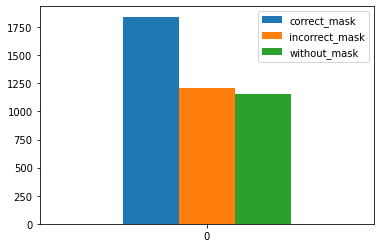

In [ ]:
lables = [ 'correct_mask', 'incorrect_mask', 'without_mask' ]
count_files = []
for i in lables:
  path, dirs, files = next(os.walk("/content/dataset/"+i))
  count_files.append(len(files))

df = pd.DataFrame(data={'correct_mask': [count_files[0]],
                        'incorrect_mask': [count_files[1]],
                        'without_mask': [count_files[2]]})
df.plot.bar(rot=0)
print (df)

##**3. Đọc dữ liệu và phân chia thành các tập train, validation và test.**

In [ ]:
CATEGORY = [ 'correct_mask', 'incorrect_mask', 'without_mask' ]

# this is a np.array() that each element is a
train_images = []
train_labels = []
validation_images = []
validation_labels = []
test_images = []
test_labels = []
label = 0

for category in CATEGORY:
    path = os.path.join("/content/dataset", category)
    listdir = os.listdir(path)
    random.shuffle(listdir)
    
    _70_percent_train = int(len(listdir) * 0.7)
    # 15 phần trăm validation, còn lại sẽ là test
    _15_percent_validation = int(len(listdir) - _70_percent_train) // 2

    print(f"{category} size: {len(listdir)}")
    print(f"train size: {_70_percent_train}")
    print(f"validation size: {_15_percent_validation}")
    print(f"test size: {len(listdir) - _70_percent_train - _15_percent_validation}\n")
    
    # training data
    first = 0
    last = _70_percent_train
    for img in listdir[first : last]:
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        train_images.append(image)
        train_labels.append(label)
    
    # validation data
    first = last
    last = first + _15_percent_validation
    for img in listdir[first : last]:
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        validation_images.append(image)
        validation_labels.append(label)

    # test data
    first = last
    for img in listdir[first : -1]:
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        test_images.append(image)
        test_labels.append(label)
    label += 1

train_images = np.array(train_images, dtype='float32')
train_labels = np.array(train_labels)
validation_images = np.array(validation_images, dtype='float32')
validation_labels = np.array(validation_labels)
test_images = np.array(test_images, dtype='float32')
test_labels = np.array(test_labels)

correct_mask size: 1843
train size: 1290
validation size: 276
test size: 277

incorrect_mask size: 1212
train size: 848
validation size: 182
test size: 182

without_mask size: 1153
train size: 807
validation size: 173
test size: 173



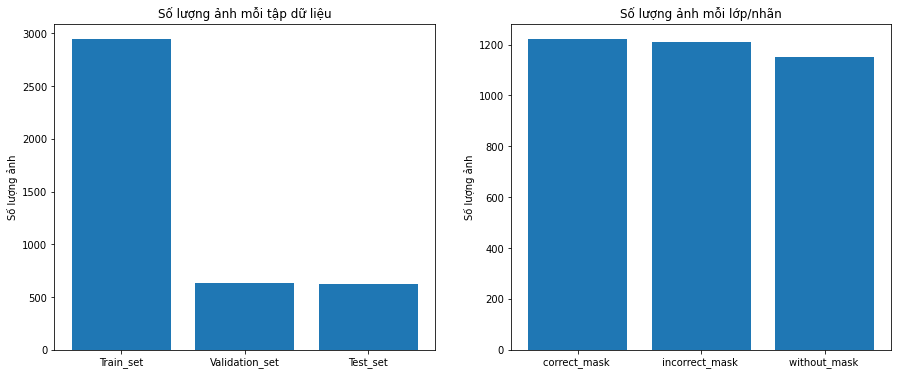

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.bar(x = ['Train_set', 'Validation_set', 'Test_set'], 
        height = [len(train_images), len(validation_images), len(test_images)])
plt.ylabel('Số lượng ảnh')
plt.title("Số lượng ảnh mỗi tập dữ liệu")

plt.subplot(1, 2, 2)
plt.bar(x = ['correct_mask ', 'incorrect_mask ', 'without_mask '], height = [1221, 1212,1153])
plt.ylabel('Số lượng ảnh')
plt.title("Số lượng ảnh mỗi lớp/nhãn")

plt.show()

Chuyển train_labels, validation_labels và test_labels sang dạng one-hot.

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.fit_transform(validation_labels)
test_labels = lb.fit_transform(test_labels)

Tuy nhiên, tất cả dữ liệu cả 3 tập dữ liệu của nhóm sau khi phân chia được sắp xếp theo lớp (correct_mask, incorrect_mask, without_mask) nên để đảm bảo rằng các mô hình có tính tổng quát và hạn chế overfit trong quá trình đào tạo, việc xáo trộn dữ liệu là cần thiết trong trường hợp này.


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels)
validation_images, validation_labels = shuffle(validation_images, validation_labels)
test_images, test_labels = shuffle(test_images, test_labels)

##**4. Lựa chọn mô hình cơ sở**

Nhóm em xuất phát từ các mạng cổ điển như AlexNet, VGG-16,.... để xây dựng bộ khung cơ bản cho kiến ​​trúc các mô hình của mình. Cụ thể tụi xây dựng 3 mô hình thử nghiệm theo các xu hướng theo trong các lớp Conv-Pool xen kẽ hoặc Conv-Conv-Pool-Conv-Conv-Pool lấy cảm hứng từ VGG hoặc xu hướng trong kernel_size tăng dần,...

Dựa vào những điều đó, nhóm em đề xuất 3 mô hình kiến trúc CNN của mình và train, thử nghiệm cả 3 mô hình để qua đó chọn ra một mô hình để tối ưu, cụ thể là:

1. Kiến trúc 1 với các lớp Conv-Pool xen kẽ với số Filters tăng dần từ 32->64->96->128->256->384
2. Kiến trúc 2 với các lớp Conv-Pool xen kẽ với sô Filter tăng cách 1 lớp. Cụ thể số filter là: 64->64->128->128->256->256.
3. Kiến trúc 3 lấy ý tưởng từ các lớp VGG16 là Conv-Conv-Pool-Conv-Conv-Pool-Conv-Conv-Conv-Pool-Conv-Conv-Conv-Pool với số filter lần lượt ứng với Conv là 32-32-64-64-128-128-128-256-256-256.

Tuy nhiên trước khi đến phần xây dựng kiến trúc, thì chúng ta cần tìm hiểu một số khái niệm trước.


**Hàm kích hoạt Relu** *(ReLU activation function)*

Hàm RELU là một “*hàm kích hoạt*” phi tuyến tính có công thức $f(x) = max(0, x)$, hàm RELU áp dụng với trường hợp cần đầu ra nằm trong khoảng $(0, +∞)$, nó có tốc độ tính toán rất nhanh, gán các giá trị âm trở thành $0$ ngay lập tức.

*Đồ thị hàm ReLu*

![grap_relu](https://drive.google.com/uc?export=view&id=1OJLx6jQMYDq-H4SWgS9Qa6ZahiMTbEsd)

Do ReLU cần ít vòng lặp hơn để đạt được tỉ lệ lỗi tương đương khi sử dụng sigmoid nên đa số các mô hình CNN gần đây sử dụng hàm ReLU để làm “hàm kích hoạt” thay vì hàm sigmoid như các neural network truyền thống, hơn nữa hàm sigmoid sử dụng exp() và công thức tính phức tạp hơn nên tốn nhiều chi phí tính toán hơn.

Hình dưới đây là so sánh cho thấy số lần lặp lại cho một convolutional network với 4 lớp dựa trên CIFAR-10 đã đạt đến 25% lỗi huấn luyện trong tanh và ReLU:  

Nét liền là ```ReLu```, nét đứt là ```tanh```. Sử dụng ReLu nhanh gấp 6 lần tanh

![relu_tanh](https://drive.google.com/uc?export=view&id=1usPCKt4AVsYYn2ZvFiV-HDkD3RxeRkmk)

*Hàm ReLU trả về giá trị của X khi X> 0, Ngược lại trả về 0*

![relu](https://drive.google.com/uc?export=view&id=124H1E0baiZDsH4KOxXnn9rVOqVTVyRj9)




###**4.1. Sử dụng các lớp Conv-Pool xen kẽ**

Trong xu hướng này, nhóm em xây dựng 2 kiến trúc cơ sở sử dụng với lớp Conv và Pool xen kẽ nhau.

Vậy làm thế nào để xây dựng kiến ​​trúc bạn yêu cầu? hãy bắt đầu nào. Nhưng trước đó, tôi muốn tóm tắt lại rằng khi sử dụng lớp Convolution hoặc Pooling, chúng tôi giảm kích thước của hình ảnh đầu vào có kích thước N thành (N-f + 1) / s trong đó 'f' là kích thước bộ lọc và 's' chiều dài sải chân, điều này sẽ rất hữu ích cho chúng tôi trong suốt quá trình.

####*4.1.1. Kiến trúc 1: Các lớp Conv-Pool xen kẽ với số Filter tăng dần từng lớp*

Model nhận đầu vào là ảnh (224,224,3) đầu ra là FC softmax với nodes = 3 *(số lớp/nhãn dự đoán)*. Ở giữa là 1 kiến trúc CNN đơn giản với các thứ tự các lớp như sau: *CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL= > CONV(relu) => MAXPOOL => FC(relu) => FC(softmax)*.

**Chú ý:** (CONV + Pooling) là 1 lớp *(layer)*

Cụ thể:

![model_1](https://drive.google.com/uc?export=view&id=19hUmQfqgyww0uonzPVrIRRACn7xCqsdD)

Cách tính các giá trị sau mỗi Conv2D và Pooling với:

**N:** kích thước đầu vào

**f:** kích thước filters

**s:** độ dài stride

**ceil** (```math.ceil()```): Làm tròn một số lên đến số nguyên gần nhất của số đó.

- **Activation shape**:

  - Với ```Padding = 'valid'``` *(mặc định)*: $(ceil (N+f-1)/s, ceil(N+f-1)/s,$ *Số lượng Filters*)
  - Với ```Padding = 'same'```: $(N, N,$ *Số lượng Filters*)

- **Activation Size:** Nhân tất cả giá trị trong *Activation Shape*


- **Số lượng parameter:**
    - ***Lớp đầu vào*** *(input layer)*: Lớp đầu vào không có gì để học, về cốt lõi, những gì nó làm chỉ là cung cấp hình dạng của hình ảnh đầu vào. Vì vậy, không có tham số có thể học được ở đây. Như vậy số **parameter = 0**.

    - ***CONV2d***: Đây là nơi CNN học, vì vậy chắc chắn sẽ có ma trận trọng số *(weight matrices)*. Các tính toán tham số: 
    
      **```param = ((m * n * d) +1) * k)```**
    
     Trong đó:

     - m: chiều rộng *(width)* của filter

     - n: chiều cao *(height)* của filter

     - d: số lượng filter của lớp trước

     - k: số lượng filter của lớp hiện tại
     
     cộng 1 vì bias cho mỗi filter. Ngoài ra, dựa vào quy ước **f, N, s** ở trên, tham số ở lớp CONV có thể được tính theo công thức: ```param = ((f * f * d) + 1) * k)```

    - ***Pooling***: Ở đây chỉ đơn giản là giảm kích thước ma trận input theo một *pool_size* nên không có tham số, **parameter = 0**.

    - ***Lớp kết nối đầy đủ (FC)***: So với các lớp khác, lớp này thường có số lượng tham số cao nhất, bởi vì, mọi nơ-ron đều được kết nối với mọi nơ-ron khác. Cách tính số tham số *(cộng 1 là bias term)*:

      **```param = ((nơron lớp hiện tại c * nơron lớp trước p) + 1 * c)```**




Ví dụ: ở hàng 2, *Conv2D(f=3,s=1)* ta có: N = 224, f = 3, s = 1, padding = valid, số lượng filter = 32
- Activation shape = *(ceil(224+3-1)/1, ceil(224+3-1)/1, 32) = (222,222, 32)*
- Activation size = 222 \* 222 \* 32 = 1577088
- số lượng parameter = (3 \* 3 \* 3 +1) \* 32 = 896

***Tại sao phải tạo trang tính như trên?***

$\Rightarrow$ Tính toán này giúp nhóm em biết liệu kiến trúc nhóm em có đang chọn đúng các tham số trong khi xây dựng kiến ​​trúc CNN của mình hay không vì kiến ​​trúc không được kết thúc với kích thước âm *(negative dimensions)* bằng cách sử dụng quá mức với các giá trị cao của độ dài stride *(stride length)* và kích thước filter *(filter-sizes)*.

***Tham số (parameter) được hiểu như thế nào?***

Về cơ bản, số lượng tham số trong một lớp nhất định là số phần tử “có thể học được” *(learnable)* cho một bộ lọc *(filter)* hay còn gọi là tham số cho bộ lọc cho lớp đó. 

Nhìn chung các tham số là trọng lượng *(weight)* được học trong quá trình đào tạo. Chúng là ma trận trọng số *(weight matrices)* đóng góp vào khả năng dự đoán của mô hình, được thay đổi trong quá trình truyền ngược *(back-propagation)*. Thuật toán đào tạo và các biện pháp tối ưu được sử dụng sẽ quyết định sự thay đổi được nêu ở đây.


In [ ]:
model_1 = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(96, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(384, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

Kết quả khi sử dụng phương thức ```model.summary()``` cho thấy những kết quả tính toán từ trang tính các giá trị trên của nhóm là đúng. 

Ta có tổng số lượng tham số sẽ là 1,564,451. Số lượng tham số càng nhiều thì độ phức tạp của model càng lớn và dễ dẫn đến overfit, hoặ quá ít thì không đủ mạnh với những dữ liệu phức tạp. 

####*4.1.2. Kiến trúc 2: Các lớp Conv-Pool xen kẽ với số Filter tăng cách 1 lớp*

Tương tự ở kiến trúc đầu tiên, model nhận đầu vào là ảnh (224,224,3) đầu ra là FC softmax với nodes = 3 *(số lớp/nhãn dự đoán)*. Ở giữa là 1 kiến trúc CNN đơn giản với các thứ tự các lớp như sau: *CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL => CONV(relu) => MAXPOOL= > CONV(relu) => MAXPOOL => FC(relu) => FC(softmax).*

Tuy nhiên có sự khác nhau là ở kiến trúc số đầu tiên, ```kernel_size``` tăng dần từ 32->64->96->128-256->384 sau mỗi lớp. Thì ở kiến trúc thứ 2, vẫn là xen kẽ giữa CONV và Pool, nhưng ```kernel_size``` sẽ tăng cách lớp. Cụ thể 64->64->128->128->256->256

Cụ thể trang tính:

![model_2](https://drive.google.com/uc?export=view&id=1CM5hCGupC1hRyOmcNWlhE2mXPFbTbLec)


In [ ]:
model_2 = models.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)      

###**4.2. Ý tưởng từ các lớp của kiến trúc VGG16**

####*4.2.1. Kiến trúc 3: Các lớp Conv-Conv-Pool-Conv-Conv-Pool-...*

Lấy cảm hứng từ kiến trúc VGG16, model nhận đầu vào là ảnh (224,224,3) đầu ra là FC softmax với nodes = 3 *(số lớp/nhãn dự đoán)*. Ở giữa là 1 kiến trúc CNN với các thứ tự các lớp như sau: *CONV(relu) => CONV(relu) => MAXPOOL => CONV(relu) => CONV(relu) => MAXPOOL => CONV(relu) => CONV(relu) => CONV(relu)=> MAXPOOL => CONV(relu) => CONV(relu) => CONV(relu) => MAXPOOL => FC(softmax).*

Cụ thể các thông số:

![model_2](https://drive.google.com/uc?export=view&id=11zPGA8YWG5OUuTTzZ2Jv6nIzHWilY92Y)


In [ ]:
model_3 = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(224,224,3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 51, 51, 128)      

###**4.3. So sánh các giá trị khi train thử nghiệm các model**
*(Code đầy đủ ở mục "1. Lựa chọn mô hình cơ sở" phần VIII. PHỤ LỤC)*

Trong thử nghiệm này, nhóm em so sánh trên các giá trị loss và accuracy của cả 3 tập test, validation và train. Do đây mới là thử nghiệm nhằm chọn một mô hình trong 3 mô hình đề xuất trên để chon được 1 mô hình và tiến hành tối ưu hóa, cải thiện mô hình đó.

Nhóm em chọn hàm tối ưu là **Adam** và hàm loss là **Multi-Class Cross-Entropy**. Với giá trị ```learning rate = 0.001 = 1e-3``` để bắt đầu thử nghiệm các mô hình của mình.

**Lưu ý:** *Việc thử nghiệm nhóm em không sử dụng bất kì một phương pháp tối ưu hóa hay cải thiện nào để đào tạo mô hình. Đây đều là những cái cơ bản nhất của việc tạo ra một mô hình CNN.*

Dựa vào kết quả về các giá trị loss và accuracy trên cả 2 tập validation, train thì model_1 *(sử dụng các lớp CONV-Pool xen kẽ nhau và kenerl_size tăng dần)* cho kết quả tốt nhất trong tất cả các giá trị được đánh giá. Cụ thể bảng dữ liệu dưới:
![compare_score](https://drive.google.com/uc?export=view&id=1SKVKrsSzAEI88wegxyOM2ow5Q-AJfiUg)

và biểu diễn bằng biểu đồ để có cái nhìn trực quan hơn. 

![barplot_compare_score](https://drive.google.com/uc?export=view&id=1ejIl-JhZ9MdsaJGaP3MeWbKd5EEYUJzl)

Sẽ là tốt nếu loss thấp và accuracy cao. Xét trên tiêu chí đó thì model_1 nhỉnh hơn ở hầu hết các giá trị được so sánh, trừ ở ***val_loss*** thì model_1 cao hơn hơn model_2. Vì thế nhóm em chọn *model_1 với CONV-Pool xen kẽ và số lượng filters tăng dần qua mỗi lớp* là mô hình cơ sở của nhóm để tiến hành tối ưu và cải thiện.
```
model_1 = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(96, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(384, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])
```

#**VI. CẢI THIỆN MÔ HÌNH**


![curve_model_1](https://drive.google.com/uc?export=view&id=1jw2YyxjHEHCeseWNoAofiY0vP0I7LMce)

Đường cong loss và accuracy của mô hình của nhóm em, chưa cần phải phân tích, nhìn qua có thể dễ dàng nhận ra là mô hình không tốt và bị overfit.

Có nhiều nguyên nhân có thể dẫn tới tình trạng này, có thể là do mô hình quá đơn giản, hoặc cũng có thể là do dataset của nhóm chưa đủ lớn,...

Để cải thiện mô hình và tránh tình trạng overfit, nhóm em sử dụng các phương pháp sau:
1. Sử dụng Dropout
2. Sử dụng Batch Nomalization
3. Sử dụng Data Augmentation
4. Điều chỉnh các Parameters
5. Sử dụng Early Stopping và Model Check point
6. Chọn một hàm Optimizer và Loss phù hợp 

##**1. Overfit, Underfit, Goodfit**


Việc cải thiện mô hình là điều bắt buộc phải làm. Tuy nhiên, khi áp dụng các phương pháp nhằm cải thiện, tối ưu hóa thì chúng ta lấy gì để đánh giá mô hình có tốt hay không.

Chúng ta có thể dựa vào giá trị loss và accuracy khi kiểm tra trên các tập train, validation và test. Nhưng, cách đánh giá này đôi khi không hiệu quả, một mô hình bị overfit hay underfit vẫn có khả năng cho ra giá trị loss thấp và accuracy cao. Điều đó có thể do bộ dữ liệu của nhóm còn hạn chế và không quá lớn. Nên việc chỉ đánh giá qua các số liệu như vậy không thể hiện được mô hình có tốt hay không. Nên nhóm em dựa vào đường cong loss và accuracy để đánh giá mô hình có tốt hay không (loss chính).

Trước khi đi vào các phương pháp cải thiện, nhóm em sẽ sơ qua về cách đánh giá một mô hình thế nào là goodfit(), overfit(), underfit().


Các tính năng điển hình của đường cong học tập của một mô hình phù hợp tốt
Mất đào tạo và mất xác thực gần nhau với mất xác thực lớn hơn một chút so với mất đào tạo.
Ban đầu giảm đào tạo và mất xác thực và mất đào tạo và xác thực khá ổn định sau một số thời điểm cho đến khi kết thúc.

![fit](https://drive.google.com/uc?export=view&id=1wcdSKfNA1wu7sPoZZhChtDcJvmq6dYRO)

####**1.1.1. Overfit**

Một mô hình được cho là overfit nếu nó được đào tạo quá nhiều trên dữ liệu. Một mô hình overfit học từng ví dụ một cách hoàn hảo dẫn đến khi gặp một ví dụ chưa từng thấy/mới thì mô hình phân loại sai. Đối với một mô hình overfit, chúng ta sẽ có giá trị trên tập train hoàn hảo hoặc gần đến hoàn hảo trong khi giá trị trên tập validation thì kém.

Lý do có thể dẫn đến overfit có thể là: 
1. Sử dụng một mô hình phức tạp cho một bài toán đơn giản lấy nhiễu từ dữ liệu. Ví dụ: mạng VGG16 cho tập dữ liệu của nhóm với hơn 3000 ảnh.
2. Tập dữ liệu nhỏ, vì tập train có thể không bao quát được vấn đề.

####**1.1.1. Underfit**

Một mô hình được cho là Underfit nếu nó không học các mẫu trong dữ liệu một cách chính xác. Một mô hình underfit không học đầy đủ từng ví dụ trong tập dữ liệu. Trong những trường hợp như vậy, giá trị trên cả tập train và tập validation/test đều thấp.

Lý do có thể dẫn đến underfit là:
1. Sử dụng một mô hình đơn giản cho một vấn đề phức tạp không học được tất cả các mẫu trong dữ liệu. Ví dụ: Sử dụng logistic regression để phân loại hình ảnh

1. Dữ liệu cơ bản không có khuôn mẫu vốn có. Ví dụ, cố gắng dự đoán điểm của một học sinh với trọng lượng hay số tuổi của cha cậu ta.

####**1.1.3. Goodfit**
Các đặt điểm của một mô hình Goodfit:

1. Training loss và Validation loss gần nhau với validation loss lớn hơn một chút so với training loss.
2. Ban đầu training và validation loss có xu hướng giảm và training và validation loss khá ổn định sau một số thời điểm cho đến khi kết thúc.

##**2. Early Stopping và ModelCheckpoint**

--------------------

###**2.1 Early Stopping**

Một vấn đề với đào tạo mạng nơ-ron là ở việc lựa chọn số lượng epochs đào tạo để sử dụng. Việc chọn số epochs quá lớn có thể dẫn đến *overfiting* tập dữ liệu đào tạo, trong khi quá ít có thể dẫn đến mô hình *underfit*. *Early Stopping* là phương pháp cho phép chỉ định một số lượng epochs để đào tạo và dừng đào tạo khi hiệu suất mô hình ngừng cải thiện trên *validation dataset*
```
es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
```

- các tham số:

    - **```monitor ="val_loss"```**	giá trị *validation loss* được theo dõi giám sát. Ngoài ra nó có thể là giá trị *validation accuracy*. 

    - **```mode = "min"```:**	Ở chế độ ```min``` quá trình đào tạo sẽ dừng lại khi số lượng được theo dõi ngừng giảm. Nếu ```monitor = "val_loss"```
        - Ngoài ra còn 2 chế độ là ```{"auto", "max"}``` . 
        - ở chế độ ```max``` nó sẽ dừng khi số lượng được theo dõi ngừng tăng lên. Nếu ```monitor = accuracy```
        - Ở chế độ ```auto```, hướng được tự động suy ra từ tên của đại lượng được giám sát. 

    - **```patience = 10```**:	*int*. Sau 10 epochs mà giá trị *validation loss* không có sự cải thiện thì quá trình đào tạo sẽ bị dừng. 

    - **```restore_best_weights = True```**:	*boolean*. Có khôi phục trọng số mô hình từ epochs với giá trị tốt nhất của số lượng được giám sát hay không. Nếu ```True``` là có, Ngược lại nếu ```False```, trọng số mô hình thu được ở bước huấn luyện cuối cùng sẽ được sử dụng.

    - **```verbose=1```**: Cho biết giá trị epochs khi mô hình dừng đào tạo.


###**2.2. Model Checkpoint**

Tuy nhiên một vấn đề khác là *callback EarlyStopping* sẽ ngừng đào tạo khi mô hình ngừng cải thiện, nhưng các mô hình ở phần cuối của huấn luyện thể không phải là mô hình với hiệu suất tốt nhất trên các tập dữ liệu xác nhận. 

Việc thêm một ***callback ModelCheckpoint*** sẽ lưu mô hình tốt nhất được quan sát trong quá trình đào tạo để sử dụng sau này. Trong bài toán này nhóm em sẽ sử dụng nó chỉ để lưu các mô hình tốt nhất quan sát được quá trình train theo phép đo được thực hiên trên *validation dataset*.
```
mc = callbacks.ModelCheckpoint('mask_detector.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)
```


- Các tham số:
  - **```filebatch```**: *mask_detector.h5*. Đây tên và định dạng mô hình được lưu tại thư mục trên colab. Và nó không bao gồm các tùy chọn đặt tên khác.
  - **```monitor='val_accuracy'```**: chỉ số cần theo dõi
  - **```save_best_only=True```*** nó chỉ lưu khi mô hình được coi là "*tốt nhất*" do ```filepath``` không chứa các tùy chọn định dạng như ```{epoch}``` thì ```filepath``` sẽ bị ghi đè bởi mỗi mô hình mới tốt hơn.
  - **```mode='max'```**: ghi đè tệp lưu hiện tại với một tệp mà giá trị *val_accuracy* cao hơn. Đối với *val_loss* thì ```mode=min```.
  - **```verbose=1```**: biết giá trị của phép đo hiệu suất của mô hình được lưu vào thời điểm nào.

Để sử dụng Early Stopping và Model Checkpoint thì trong keras ```fit()``` ta thêm thông số: ```callbacks = [es, mc]```


##**3. Sử dụng Dropout**



Dropout có thể được hiểu đơn giản trong mạng neural network là kỹ thuật giúp chúng ta sẽ bỏ qua một vài unit trong suốt quá trình đào tạo trong mô hình, những unit bị bỏ qua được lựa chọn ngẫu nhiên. Ở đây, chúng ta hiểu bỏ qua là unit đó sẽ không tham gia và đóng góp vào quá trình huấn luyện.

![dropout](https://drive.google.com/uc?export=view&id=1OXjHnbTNYO4xBQyrJjannaNqAQ9wRqZ_)

**Vậy tải sao lại sử dụng Dropout để cải thiện mô hình?**

Dropout Layer là một trong những kĩ thuật regularization  phổ biến nhất để giảm bớt overfit trong các mô hình Deep learning. Các thí nghiệm cho thấy rằng kỹ thuật Dropout này điều chỉnh mô hình mạng nơron để tạo ra một mô hình mạnh mẽ nhưng không bị overfit.

Dropout có thể được thực hiện trên bất kỳ hoặc tất cả các lớp ẩn *(hidden layer)* trong mạng hoặc lớp đầu vào *(input layer)*. Nó không được sử dụng trên lớp đầu ra *(output layer)*

**Dropout trong keras**
```
tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)
```

Dropout có thể được thêm vào mô hình Keras với model.add và có các thuộc tính sau:

- **```rate```** *(tỷ lệ)*: kiểu float trong khoảng [0;1]. Cho biết phần của đơn vị đầu vào sẽ bị loại bỏ 

Giá trị dropout phổ biên trong lớp ẩn là từ 0,5 đến 0,8. Các lớp đầu vào sử dụng tỷ lệ bỏ học lớn hơn, chẳng hạn như 0,8.... Tuy vậy Dropout cũng là một siêu tham số, và tùy vào mô hình sẽ có giá trị phù hợp, nên ở phần này, nhóm em sẽ sử dụng dropout = 0.5 như khởi tạo để thử nghiệm, khi đến phần điều chỉnh siêu tham số thì sẽ tìm một giá trị tốt hơn.


Một vấn đề khi sử dụng Dropout mà nhóm em gặp phải đó là nên đặt Dropout nên đặt ở đâu trong kiến trúc CNN ban đầu. Nên sau một vài thử nghiệm đặt Dropout thì nhóm em nhận thấy việc đặt Dropout sau ```layers.Dense(512, activation='relu'),``` mang đến đường cong mô hình khá tốt. Nên nhóm em chọn vị trí đó với giá trị Dropout ban đầu bằng 0.5.

In [ ]:
model_1 = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(96, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(384, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),

    #Thêm Dropout(0.5)
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

###**3.1. Thử nghiệm mô hình**

*(Code mô tả đầy đủ ở mục "2. Code kết hợp Dropout,EarlyStopping, ModelCheckpoint" VIII. PHỤ LỤC)*

Đào tạo thử nghiệm mô hình với các giá trị learning_rate = 0.001; Batch size = 32

Với việc sử dụng Early Stopping và Model Checkpoint cộng với Dropout=0.5 với vị trí đặt như trên thì nhóm em tiến hành đào tạo thử mô hình để xem với 2 phương pháp ban đầu mô hình đã có cải thiện hơn chưa.

Khi sử dụng Early Stopping và Model Checkpoint với ```verbose=1``` thì quá trình đạo tạo được diễn ra như hình dưới đây:
```
Epoch 00017: val_accuracy did not improve from 0.91601
Epoch 18/100
93/93 [==============================] - 5s 54ms/step - loss: 0.1480 - accuracy: 0.9474 - val_loss: 0.3237 - val_accuracy: 0.9065

Epoch 00018: val_accuracy did not improve from 0.91601
Epoch 19/100
93/93 [==============================] - 5s 54ms/step - loss: 0.1321 - accuracy: 0.9545 - val_loss: 0.3281 - val_accuracy: 0.8827

Epoch 00019: val_accuracy did not improve from 0.91601
Epoch 20/100
93/93 [==============================] - 5s 53ms/step - loss: 0.1447 - accuracy: 0.9538 - val_loss: 0.2971 - val_accuracy: 0.9192
Restoring model weights from the end of the best epoch.

Epoch 00020: val_accuracy improved from 0.91601 to 0.91918, saving model to mask_detector.h5
Epoch 00020: early stopping
```

Model checkpoint sẽ chọn epoch mà có giá trị ```val_accuracy``` cao để cập nhât, nếu không thì vẫn giữ lại các trọng số ở quá trình đào tạo được cập nhật trước đó. Khi đào tạo kết thức, mô hình sẽ quay lại các trọng số đã lưu trước đó.

Bên cạnh đó Với việc sử dụng Early Stopping, có thể ở epochs thứ 39 mô hình đã dừng. Với việc đặt ```patience = 10``` thì ở 5 epoch trước đó, mô hình đã bắt đầu có dấu hiệu overfit, và đợi thêm 10 epoch vẫn chưa có cải thiện thì việc đào tạo sẽ dừng lại. Và đường cong dưới đây có thể thấy rõ điều đó. Ở epoch thứ 29

![model_1_dropout](https://drive.google.com/uc?export=view&id=1zNJIiIIXFx4rBtabNsxayT4F0HboC37j)


*Khi mô hình sử dụng Early stopping, model checkpoint, dropout*

![model_1_dropout_score](https://drive.google.com/uc?export=view&id=1r6JkQC9V-iUzQkvq--6lbrP8vELKrdGI)

Kết quả giá trị loss và accuracy trên tập train lần lượt là 0.0517 và 0.9864. Đây là một kết quả tốt, với tập validation là loss là 0.1677 *(gấp hơn 3 lần trên tập train)* và accuracy là 0.9572, hơi thấp hơn trên tập train nhưng cũng là giá trị chấp nhận được.

Kết quả thử nghiệm đều khá tốt. Tuy vậy nhóm em luôn đặt ra câu hỏi với dữ liệu mà nhóm thu thập được (hơn 3000 ảnh) thì kết quả như thế này có phải là quá lý tưởng?
Khi nhìn vào đường cong loss của biểu đồ trên thì có thể thấy khoảng cách giữa 2 đường train và validation còn lớn. Nên nhóm em vẫn chưa cho đây là một mô hình tốt, nhóm em tiếp tục thử nghiệm và kết hợp với các phương pháp nhằm cải thiện mô hình nhiều nhất có thể.



##**4. Sử dụng Batch Normalization**

###**4.1. Feature Scaling**

**Feature Scaling**: Trong thực tế, chúng ta thường gặp các loại biến *(variables)* khác nhau trong cùng một tập dữ liệu. Một vấn đề quan trọng là phạm vi của các biến có thể khác nhau rất nhiều. Sử dụng tỷ lệ ban đầu có thể đặt nhiều trọng số hơn cho các biến có phạm vi lớn. Để giải quyết vấn đề này, chúng ta cần áp dụng kỹ thuật ***Feature Scaling*** cho các biến độc lập hoặc đặc điểm của dữ liệu trong bước xử lý trước dữ liệu. 

> Mục tiêu của việc áp dụng ***Feature Scaling*** là đảm bảo các tính năng có cùng tỷ lệ để mỗi tính năng đều quan trọng như nhau và giúp cho việc xử lý dễ dàng hơn bằng hầu hết các thuật toán máy học.

Có hai phương pháp chính để chuẩn hóa dữ liệu của chúng tôi.

1. **Max-Min Normalization**: Phương pháp đơn giản nhất là chia tỷ lệ nó thành một phạm vi từ 0 đến 1, được biết đến là phương pháp **Chuẩn hóa tối đa**:

  $$
x_{normalized} = \frac{x-m}{x_{max}-x_{min}}
  $$

  Trong đó:
  - $x$: điểm dữ liệu cần chuẩn hóa 
  - $m$: giá trị trung bình của tập dữ liệu, 
  - $x_ {max}$: giá trị cao nhất 
  - $x_ {min}$: giá trị thấp nhất. 

  Kỹ thuật này là để chia lại tỷ lệ các feature *(re-scales features)* với giá trị phân phối từ 0 đến 1. Đối với mọi feature *(đặc trưng)*, giá trị nhỏ nhất của feature đó được chuyển thành 0 và giá trị lớn nhất được chuyển thành 1.

  Trong sklearn, ta có thể sử dụng: **```from sklearn.preprocessing import MinMaxScaler```** để áp dụng chuấn hóa tối đa này.

2. **Standardisation** *(Chuẩn hóa)* hoặc Z-score normalization - (chuẩn hóa điểm Z)*: các tính năng sẽ được thay đổi tỷ lệ để đảm bảo giá trị trung bình và độ lệch chuẩn lần lượt là 0 và 1. 

  $$
x_{normalized} = \frac{x-m}{z}
  $$

  Trong đó:
  - $x$: là điểm dữ liệu để chuẩn hóa 
  - $m$: là giá trị trung bình của tập dữ liệu
  - $s$: là độ lệch chuẩn của tập dữ liệu *(standard deviation)*

  Kỹ thuật này là chia lại tỷ lệ các feature *(re-scales features)* với giá trị phân phối từ 0 đến 1, rất hữu ích cho các thuật toán tối ưu hóa, chẳng hạn như độ dốc gradient, được sử dụng trong các thuật toán học máy có trọng số đầu vào (ví dụ: hồi quy và mạng nơ-ron).

  Trong sklearn, ta có thể sử dụng: **```from sklearn.preprocessing import StandardScaler```** để sử dụng chuẩn hóa này.

Trong Batch Norm, chúng tôi sử dụng kỹ thuật cuối cùng này để chuẩn hóa các lô dữ liệu bên trong chính mạng.

###**4.2. Batch Normalization**


**Batch Normalization** *(gọi tắt là Batch Norm)* là một kỹ thuật chuẩn hóa được thực hiện giữa các lớp của Mạng Nơron thay vì trong dữ liệu thô . Nó được thực hiện dọc theo các mini-batches thay vì toàn bộ tập dữ liệu. Điều này có tác dụng ổn định quá trình học tập và giảm đáng kể số lượng kỷ nguyên đào tạo cần thiết để đào tạo mạng sâu, dẫn đến tăng tốc độ học tập của mô hình và tiết kiệm  thời gian.

Các giai đoạn biến đổi Batch Norm trong quá trình đào tạo là:

![batch_ct1](https://drive.google.com/uc?export=view&id=18rDvIrd6klRX9szouWlVw5InwIC8ls8B)

![batch_ct2](https://drive.google.com/uc?export=view&id=103zJcG7ela541f_2XOel01pQF2Y9Dxc7)


Đầu tiên Batch Norm sẽ tính **giá trị trung bình $\mu$** và **độ lệch chuẩn $\sigma$**. 

Sau đó, **chuẩn hóa $Z^{(i)}$** với (3). Bằng cách đó, đầu ra của mỗi nơ-ron tuân theo phân phối chuẩn thông thường trên toàn bộ lô. ($\varepsilon$ là hằng số được sử dụng để ổn định số)

![batch_ct3](https://drive.google.com/uc?export=view&id=1xq-MObKaDKAp7Zv_AU6Z9ojXyuk6GjPR)
*(Ví dụ về lớp ẩn 3 nơron, với một batch có kích thước b. Mỗi nơron tuân theo một phân phối chuẩn.)*

Cuối cùng, nó tính toán đầu ra của lớp $Z^{(i)}$ bằng cách áp dụng một phép biến đổi tuyến tính với $\gamma$ và $\beta$ (4). Bước như vậy cho phép mô hình chọn phân phối tối ưu cho mỗi lớp ẩn, bằng cách điều chỉnh hai tham số:

- $\gamma$ cho phép điều chỉnh độ lệch chuẩn;
- $\beta$ cho phép điều chỉnh bias, dịch chuyển đường cong bên phải hoặc bên trái.

Do đó, kết quả đầu ra của Batch Norm trên một lớp dẫn đến phân phối với giá trị trung bình $\beta$ và độ lệch chuẩn là $\gamma$. Các giá trị này được học qua các epochs và các tham số học *(learning parameters)* khác, chẳng hạn như trọng số *(weight)* của các nơ-ron, nhằm mục đích giảm sự mất mát *(loss)* của mô hình.




Trong Keras, có thể sử dụng Batch normalization theo hướng dẫn dưới đây:
```
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    **kwargs
)
```
Trên thực tế, hầu hết sẽ giữ nguyên các đối số của ```layers.BatchNormalization``` và có thể thêm vào kiến trúc CNN của mình bằng cách sử dụng: ```model.add(layers.BatchNormalization())```




###**4.3. Thử nghiệm mô hình**

Cũng giống nhau Dropout, một trong những khó khăn mà nhóm em gặp đó là đặt ```BatchNormalization``` ở vị trí nào trong kiến trúc. Có nhiều tham khảo về cách đặt vị trí, và qua nhiều lần thử nghiệm thì nhóm em chọn được đặt ```BatchNormilization``` sau mỗi ```layers.MaxPooling2D``` *(trừ layers.MaxPooling2D cuối cùng)* có thể là tốt nhất so với các lần thử nghiệm của nhóm em.

*(Code mô tả đầy đủ ở mục "3. Mô hình khi thêm Batch Normalization" VIII. PHỤ LỤC)*

**Ghi chú:** mô hình chỉ sử dụng ```BatchNormalization```, không hợp chung với Dropout đã trình bày ở phần trước.

Nhóm em thử nghiệm 2 trường hợp mà sau khi tìm kiếm thấy phổ biến:

1. CONV -> ReLu(activation) -> BatchNorm -> MaxPool

2. CONV -> BatchNorm -> ReLu -> Maxpool

**4.1.1. CONV -> BatchNorm -> ReLu -> Maxpool**

*(Code mô tả đầy đủ ở mục "3.1. CONV -> BatchNorm -> Relu ->  MaxPool" VIII. PHỤ LỤC)*

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(64, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(96, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(128, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(256, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(384, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0


Mô hình đạo tạo với learning rate = 0.001, batch size = 32 và patience = 10 *(early stopping)*. Kết quả thu được đường cong và các điểm đánh giá kết quả bên dưới.

![batch_relu](https://drive.google.com/uc?export=view&id=1zo0SDiBjilVCbgunbSVFwaj0EAica8Xl)

![batch_relu_score](https://drive.google.com/uc?export=view&id=1u6PBR6g62TKMEQbMrF0dL30KdQGrQR43)

Mô hình đã có cải thiện so với mô hình ban đầu khi chưa áp dụng bất kỳ phương pháp cải thiện hay tối ưu nào.

Một điều mà em nhìn thấy trong quá trình đào tạo là giá trị loss của tập train và validation khá gập gềnh, dù học đường nhiều ví dụ hơn nhưng đường cong train loss không thoải dần mà vẫn còn *noise*.

Bên cạnh đó, mô hình trong trường hợp này ghi nhận giá trị loss trên tập test thấp nhất từ đầu đến giờ là 0.1692, kèm theo đó accuracy trên tập test có khá cao 0.9477.

Dự đoán về sự tăng giảm bất thường của các giá tị loss của train và validation là do tập dữ liệu không quá lớn của nhóm, dẫn đến mô hình không học tập tốt.

**4.2. CONV -> ReLu -> BatchNorm -> MaxPool**

*(Code mô tả đầy đủ ở mục "3.2. CONV -> ReLu -> BatchNorm -> MaxPool" VIII. PHỤ LỤC)*

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(64, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(96, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(128, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(256, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(384, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      2

Mô hình đạo tạo với learning rate = 0.001, batch size = 32 và patience = 10 *(early stopping)*. Kết quả thu được đường cong và các điểm đánh giá kết quả bên dưới.

![relu_batch](https://drive.google.com/uc?export=view&id=1S3gcxJa-d_rLLmTwIKNr855tAJeFkrjF)

![model_batchnorm_score](https://drive.google.com/uc?export=view&id=1QWgPWPd95P7gOF3M8Xg1BzJV5Br-gw89)

Đây có thể là một thành công trong bước dầu giảm overfit của mô hình nhóm em *(so với mô hình cơ sở ban đầu)*. Tuy vẫn chưa được tốt, nhưng nếu so sánh với đường cong ban đầu khi mô hình chưa áp dụng biện pháp nào vào thì sử dụng Batch Normalization là một bước tiến đáng kể.

Bên cạnh đó, điểm dự đoán trên tập validation ở mức khả quan, nhất là giá trị loss validation có giá trị tốt nhất từ lúc thử nghiệm (0.1448).

Nếu o sánh với đường cong của mô hình cơ sở thì ít nhiều việc sử dụng Batch Norm cho kết quả khả quan hơn.
*(mô hình ban đầu, không sử dụng biện pháp cải thiện nào)*

![curve_model_1](https://drive.google.com/uc?export=view&id=1jw2YyxjHEHCeseWNoAofiY0vP0I7LMce)






##**5. Kết hợp Dropout và Batch Normalization**

Việc kết hợp giữa Dropout và Batch Normalization vấn là vấn đề có nhiều tranh cãi, có nhiều ý kiến đưa ra là việc kết hợp giữa 2 kỹ thuật này thường dẫn đến hiệu suất kém (bài báo [Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift](https://arxiv.org/pdf/1801.05134.pdf)). Tuy nhiên nhiều người đánh giá rằng việc kết hợp 2 kỹ thuật có tốt hay không dựa vào kiến trúc mô hình của mỗi người. Dựa theo những gợi ý trên trang Stackoverflow này [Ordering of batch normalization and dropout?](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout), nhóm em lựa chọn 2 cấu trúc cho vị trí đặt Dropout và Batch Normalization tong kiến trúc mô hình của mình.

1. CONV -> ReLu -> Dropout -> BatchNorm -> MaxPool

2. CONV -> BatchNorm -> ReLu -> Dropout -> MaxPool


Phần tiếp theo nhóm em sẽ thử nghiệm để cả 2 trường hợp trên và so sánh cũng như có những đánh giá riêng của nhóm.

###**5.1. Thử nghiệm mô hình**

**5.1.1. CONV -> BatchNorm -> ReLu -> Dropout -> MaxPool**

*(Code mô tả đầy đủ ở mục "4.1. CONV -> BatchNorm -> ReLu -> Dropout -> MaxPool" VIII. PHỤ LỤC)*

![b_r_d](https://drive.google.com/uc?export=view&id=1GmwgRNJnet-tb-hCF8_aEixN9MV8z88w)

![b_r_d_s](https://drive.google.com/uc?export=view&id=1i4m_bXPJLiiaqTcttOxlSwGfmSE_6P1M)

**5.1.2.  CONV -> ReLu -> Dropout -> BatchNorm -> MaxPool**

*(Code mô tả đầy đủ ở mục "4.2. CONV -> ReLu -> Dropout -> BatchNorm -> MaxPool" VIII. PHỤ LỤC)*

![r_d_b](https://drive.google.com/uc?export=view&id=1Er3YXCGDXOvXqDBqVR8vebLzzE50eupz)

![r_d_b_s](https://drive.google.com/uc?export=view&id=143cbK43Js9OQnc3Gfox-pI8lby5Ml1ZM)


Do tính chất ngẫu nhiên của thuật toán nên mỗi lần thử nghiệm sẽ có một kết quả khác nhau. Nhóm em đánh giá trên kết quả của lần chạy đầu tiên.

**Đánh giá:**

- Kết hợp 2 kỹ thuật Dropout và Batch Norm bằng cả 2 cấu trúc cho kết quả khác nhau. Và cấu trúc ***CONV -> BatchNorm -> ReLu -> Dropout -> MaxPool*** cho kết quả tốt hơn, thậm chí kết quả trên tập validation là tốt nhất từ đầu tới giờ (loss=0.1412, accuracy=0.9572).

- Ở cấu trúc 1 (ReLu-Dropout-Batch Norm) cho kết quả đường cong loss khá gập nghềnh và có dấu hiệu overfit ở epochs thứ 15. 

  Còn ở cấu trúc 2 (Batch Norm->ReLu->dropout) đây là cấu trúc đặt vị trí được nhiều khuyến nghị sử dụng và thử nghiệm của nhóm cũng minh chứng cho điều đó. Một khác biệt khá rõ là đường cong loss ở cấu trúc này mềm mại hơn ở cấu trúc 1 và có xu hướng giảm đều đặn hơn. 

Nhóm em sử dụng cấu trúc 2 (Batch Norm->ReLu->dropout) cho những cải thiện ở phần sau.

##**6. Optimizer and Loss funtion**

-------------

####**6.1. Loss funtion**

**Classification losses**
Do bài toán của nhóm đưa ra có 3 lớp là: correct mask, incorrect mask và without mask nên sẽ thuộc bài toán *multi-class classification*

Theo nhóm em tìm hiểu là chọn lựa thì có 2 hàm loss được sử dụng phổ biến trong các bài toán phân lớp đơn giản:
- Multi-Class Cross-Entropy Loss 
- Kullback Leibler Divergence Loss

Trong đó: 
- ***Multi-Class Cross-Entropy Loss***: ```categorical_crossentropy```: gần như là hàm loss mặc định để sử dụng cho các bài toán phân loại nhiều lớp. Cross-entropy sẽ tính toán điểm tổng hợp sự khác biệt trung bình giữa phân phối xác suất thực tế và dự đoán cho tất cả các lớp trong bài toán. Điểm số được giảm thiểu và giá trị  cross-entropy hoàn hảo là 0. Tuy nhiên, các *train_labels, validation_labels, test_labels* của nhóm đều phải được mã hóa thành dạng *one-hot*. 

  Vấn đề với cross-entropy khi phân loại với một số lượng lớn các labels là một quá trình *one hot encoding*. Ví dụ, dự đoán các từ trong một từ vựng có thể có hàng chục hoặc hàng trăm nghìn loại, mỗi loại cho mỗi nhãn. Điều này có nghĩa là phần tử đích của mỗi ví dụ huấn luyện có thể yêu cầu một vectơ được *one hot encoding* với hàng chục hoặc hàng trăm nghìn giá trị 0, yêu cầu bộ nhớ đáng kể. Để giải quyết vấn đề này, có thể sử dụng ***Sparse Multiclass Cross-Entropy Loss***: ```sparse_categorical_crossentropy```: *Sparse cross-entropy* Giải quyết vấn đề trên bằng cách thực hiện cùng một phép tính toán sai số *cross-entropy* mà không yêu cầu biến đích phải được *one hot encoding* trước khi train,

- **Kullback Leibler Divergence Loss**: ```kullback_leibler_divergence``` được sử dụng phổ biến hơn để tính gần đúng các hàm phức tạp hơn là trong phân loại nhiều lớp.

![loss](https://drive.google.com/uc?export=view&id=1DV9O9MYh-r-3HnA9_1lCAbAqgB13sG3h)


####**6.2. Optimizer**

**Optimizers** là các thuật toán hoặc phương pháp được sử dụng để thay đổi các thuộc tính của mạng nơ-ron của bạn, chẳng hạn như trọng số *weights* và *learning rate* để giảm tổn thất.

######**6.2.1. Gradient Descent**
Một trình tối ưu hóa cơ bản và phổ biến là **Gradient Descent** *(GD)*. Ý tưởng của **GD** xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau mỗi epochs thì cho nó tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0.

Tuy nhiên **GD** lại có nhiều hạn chế hơn là ưu điểm:
- Gradient Descent phụ thuộc vào nghiệm khởi tạo ban đầu và learning rate.
- *learning rate* quá lớn sẽ khiến cho thuật toán không hội tụ, quanh quẩn bên đích vì bước nhảy quá lớn; hoặc *learning rate* nhỏ ảnh hưởng đến tốc độ training.
 
Để giải quyết vấn đề đó, nhiều biến thể của **Gradient Descent** đã ra đời và hai trong số đó là:
- **Stochastic Gradient Descent** *(SGD)*: Với GD thông thường thì mỗi epoch ứng với 1 lần cập nhật weight *(trọng số)* với SGD thì mỗi epoch ứng với N lần cập nhật weight với N là số điểm dữ liệu. Thuật toán giải quyết được đối với cơ sở dữ liệu lớn mà *GD* không làm được. Phù hợp với online learning *(dữ liệu cập nhật liên tục)*
- **Mini-Batch Gradient Descent** *(mini-batch GD)*: Khác với SGD, mini-batch sử dụng một số lượng  n > 1 (n << N). Giống với SGD, Mini-batch Gradient Descent bắt đầu mỗi epoch bằng việc xáo trộn ngẫu nhiên dữ liệu rồi chia toàn bộ dữ liệu thành các mini-batch, mỗi mini-batch có n điểm dữ liệu. Mỗi lần cập nhật, thuật toán này lấy ra một mini-batch để tính toán đạo hàm rồi cập nhật. 

Tuy nhiên cả 3 trình tối ưu trên đều có các thách thức:
- Chọn giá trị *learning rate* tối ưu. Nếu learning rate quá nhỏ so với giảm độ dốc *(gradient descent)* có thể mất nhiều thời gian để hội tụ.
- Có thể bị mắc kẹt tại cực tiểu cục bộ.

![GD](https://drive.google.com/uc?export=view&id=16CUMd22UQmJgwvuFr-Q764TulVenEj9i)

Một trong những cách tối ưu của thuật toán **GD** và các biến thể **GD** là kết hợp với Momentum

![momentum](https://drive.google.com/uc?export=view&id=1gmCokt6FX2a9F6DFLYZrbCnjZxJFK7pT)![momentum](https://drive.google.com/uc?export=view&id=1TDlIwD8DIOpzrs2FbJn42bBgdvF82BAp)

Hình bên trái là đường đi của nghiệm khi không sử dụng Momentum, thuật toán hội tụ sau chỉ 5 vòng lặp nhưng nghiệm tìm được là nghiệm local minimun.

Hình bên phải là đường đi của nghiệm khi có sử dụng Momentum, hòn bi đã có thể vượt dốc tới khu vực gần điểm global minimun, sau đó dao động xung quanh điểm này, giảm tốc rồi cuối cùng tới đích. Mặc dù mất nhiều vòng lặp hơn, GD với Momentum cho chúng ta nghiệm chính xác hơn


Tận dụng những cải tiến đó, Trong nhiều năm trở lại đây, **Adam optimizer** nổi lên như người thay thế **Gradient Descent** với sự khắc phục được những nhược điểm của **Gradient Descent** và các biến thể của **GD**.

######**6.2.2. Adam**
Adam đã được trình bày bởi *Diederik Kingma* từ OpenAI và *Jimmy Ba* từ Đại học Toronto trong bài báo *ICLR* có tiêu đề *“ Adam: A Method for Stochastic Optimization ”* năm 2015.

Thuật toán được gọi là Adam, và nguồn góc tên Adam theo tác giả là:

> *...the name Adam is derived from adaptive moment estimation.*

Tạm dịch: 

> *Cái tên Adam có nguồn gốc từ ước tính thời điểm thích ứng.*

Theo tác giả Adam là sự kết hợp những ưu điểm của hai thuật toán mở rộng từ *stochastic gradient descent*. Cụ thể:

- **Thuật toán Adaptive Gradient** *(AdaGrad)*: Không giống như các thuật toán trước đó thì learning rate hầu như giống nhau trong quá trình training (learning rate là hằng số), Adagrad coi learning rate là 1 tham số. Tức là Adagrad sẽ cho learning rate biến thiên sau mỗi thời điểm t. Yếu điểm của Adagrad là tổng bình phương biến thiên sẽ lớn dần theo thời gian cho đến khi nó làm tốc độ học cực kì nhỏ, làm việc training trở nên đóng băng.

- **Root Mean Square Communication** *(RMSProp)*: RMSprop giải quyết vấn đề tỷ lệ học giảm dần của Adagrad bằng cách chia tỷ lệ học cho trung bình của bình phương gradient.

Nói một cách đơn giản, Adam sử dụng **Momentum** và **Adaptive Learning Rates** *(Tỷ lệ học tập)* thích ứng để hội tụ nhanh hơn.


![adam](https://drive.google.com/uc?export=view&id=1ODFPvCBZzQMdfp_bn4_QMq6-zQfx9hwv)




####**6.3. Thử nghiệm mô hình**
*(Code mô tả đầy đủ ở mục "5. Code So sánh Adam và SGD Nesterov Momentum" VIII. PHỤ LỤC)*

Theo một số trang web nhóm em tham khảo thì Learning rate được khuyến nghị sử dụng cho Adam là 0.001 hoặc 0.01. Bên cạnh đó, một đối trọng có thể dem ra so sánh với Adam là ***SGD Nesterov Momentum***. 

Nên nhóm em sẽ so sánh với hàm optimizer này với các giá trị learning rate từ 0.1, 0.01, 0.001 và 0.0001, vẽ các đường cong và so sánh các điểm dự đoán trên cả tập train, validationv

Giải thích màu:
- Màu đỏ *(red)*: validation accuracy
- Màu Xanh lá *(green)*: training accuracy
- Màu Cam *(orange)*: validation loss
- Mài xanh dương *(blue)*: training loss

![compare_opt](https://drive.google.com/uc?export=view&id=1fKcc36pAmh_NkPofgnKICL-W-MvcpuNL)


Để rõ ràng các nội dung thì nhóm em tổng hợp và vẽ lại bảng giá trị của tập train, validation trên với các giá trị learning rate *(lrate)* và hàm optimizer khác nhau.

![score_compare_opt](https://drive.google.com/uc?export=view&id=1ZyWsWYz62l8qxnqyhgKmPS6hzreNDWGr)

Thông qua các biểu đồ và bảng điểm, nhóm em có một số nhận xét sau:

1. Xét về biểu đồ, ở hàng đầu tiên với learning rate = 0.1,  Ở hình đầu tiên ở góc trái (Adam) khó có thể quan sát được các đường cong, còn về hình kế bên (SGD Nesterov Momentum) thì nhóm em nhận thấy các đường cong bị nhiễu khá nhiều và các giá trị hay tăng đột biến. Có thể nói với lrate = 0.1 thì mô hình của nhóm không phù hợp. Điều này được mình chứng bởi bảng điểm, khi ở giá trị lrate = 0.1 thì cả loss và accuracy của Adam lẫn SGD Nesterov Momentum đều tệ nhất trong bảng giá trị (loss cao nhất, accuracy thấp nhất).

2. Ở hàng 2 và hàng 3 với lrate lần lượt là 0.01 và 0.001. Theo như một số trang web mà nhóm em tham khảo [A guide to an efficient way to build neural network architectures- Part I: Hyper-parameter selection and tuning for Dense Networks using Hyperas on Fashion-MNIST](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b) thì người ta khuyến nghị giá trị lrate tốt nên bắt đầu cho SGD là 0.01 và cho Adam là 0.001. Đường cong ở hàng 2 và 3 này rõ ràng đã có cải thiện hơn so với khi sử dụng learning rate = 0.1. Tuy nhiên, ở một số epoch thì giá trị validation loss tăng đột ngột

3. Ở hàng 4, với learning rate = 0.0001, thì cả 2 biểu đồ với Adam và SGD Nesterov Momentum đều cho các đường cong khá "mềm mại". Không tăng bất thường như các biểu đồ trước.

  Với Adam thì 10 epoch đầu tiên ở train và validation loss từ cao giảm dần xuống, từ epoch thứ 10 trở đi thì train loss có xu hướng giảm nhưng rất ít, còn validation loss thì hầu như chỉ ngang ở mức 0.2. Tuy nhiên đây là mô hình sử dụng Adam có giá trị tôt thứ 2 sau mô hình Adam với lrate = 0.001.

  Còn với SGD Nesterov Momentum thì phải mức tới hơn 100 epoch mô hình mới bắt đầu có dấu hiệu overfit, thời gian hội tụ của mô hình khá lâu, nhưng bù lại là đường cong của SGD Nesterov Momentum khá đều và không có tăng bất thường. Cũng giống với đường cong khi Adam với lrate = 0.0001 thì đường cong loss của SGD Nesterov Momentum có xu hướng giảm mạnh từ epoch thứ 1 đên thứ 40. Sau epoch thứ 40 thì đường cong train loss giảm nhẹ từ từ, trong khi validation loss dao động ở mức 0.2. Một điều khá bất ngờ khác là accuracy ở trường hợp này bằng 1 trên tập train và giá trị accuracy cũng là cao nhất trên tập validation (bằng với SGD Nesterov Momentum khi learning rate = 0.001)

Dựa vào biểu đồ và bảng điểm mà nhóm em tổng kết, sẽ là khó nếu phải chọn một trong hai hàm optimizer là Adam và SGD Nesterov Momentum trong cải thiện tiếp theo nên nhóm em sẽ lấy cả 2 hàm này để cải thiện tiếp. Tuy nhiên, learning rate nhóm em sẽ thu phạm vi lại với giá trị là 0.001 và 0.0001.





##**7. Điều chỉnh Siêu tham số** *(Hyperparameter)*
Một mô hình học máy có hai loại tham số:

- Tham số *(Parameter)* có thể huấn luyện được, được thuật toán học trong quá trình huấn luyện. Ví dụ, trọng số của mạng nơ-ron là các tham số có thể đào tạo được.

- Siêu tham số *(Hyperparameter)*, cần được đặt trước khi khởi chạy quá trình học tập. Chúng không thể học được bằng cách điều chỉnh mô hình với dữ liệu. Ví dụ, learning rate, epochs, batch size,... Các siêu tham số có thể rất nhiều ngay cả đối với các mô hình nhỏ. Điều chỉnh và kết hợp siêu thông số tốt có thể cải thiện rất nhiều hiệu suất của mô hình.

Sẽ có 2 loại siêu tham số:
1. Siêu tham số liên quan đến kiến trúc của mạng *(Network structure)*
- Ví dụ: Dropout, Network Weight Initialization, Activation function,...
2. Siêu tham số liên quan đến thuật toán đào tạo
- Ví dụ: learning rate, batch size, epochs,..

Có một số phương pháp để điều chỉnh các siêu tham số này.
- Đầuu tiên phải kể đến là điều chỉnh bằng tay, ưu điểm của phương pháp này là sẽ phù hợp với máy có cấu hình vừa phải, tiết kiệm được bộ nhớ ram. Nhưng tuy nhiên, điều chỉnh bằng tay sẽ đôi khi sẽ nhàm chán và không kiểm tra hết được các trường hợp hoặc khai phá ra những con số tốt hơn.
- Thứ 2 là sử dụng các thư viện sẵn có, tiêu biểu phải kể đên 2 phương pháp Grid Search và Radom Search. Cả 2 cách này đều có trên sklearn. Ưu điểm thì sử dụng các thư viện sẵn khá đơn giản, công việc của mình chỉ là cung cấp những con số và phần còn lại là việc của máy tính. Ngoài ra, sử dụng Grid Search còn thử được tất cả các tổ hợp có thể xảy ra, đối với Ramdom Search thì phương pháp này có thể khai phá ra giá trị mới. Nhưng tuy nhiên sử dụng phương pháp này thì cần có cấu hình tốt, bởi mô hình sẽ thực hiện nhiều tính toán.

Đầu tiên nhóm em thử điều chỉnh bằng cách sử dụng thư viên Grid Search hay Ramdom Search, nhưng như trình bày ở trên thì nhóm em không đủ GPU để cho chạy 2 phương pháp này. Nhóm em chỉ sử dụng GPU free trên Colab nên dung lượng và thời gian có hạn, nhưng hầu hết các trường hợp chỉ chạy chưa được vài phút là quá dung lượng RAM nên bị "restart rumtime" trên colab. Nên nhóm em điều chỉnh các siêu tham số này bằng tay, và dựa vào những giá trị loss, accuracy và biểu đồ để chọn ra các tham số phù hợp nhất có thể đối với mô hình của nhóm.

Do có 2 loại siêu tham số (kiến trúc và thuật toán) nên nhóm em cũng sẽ chia ra làm 2 điều chỉnh ứng với 2 loại siêu tham số.

####**7.1. Điều chỉnh liên quan đến kiến trúc mạng**
*(Code mô tả đầy đủ ở mục "6.1. Code Điều chỉnh siêu tham số liên quan đến kiến trúc mạng" VIII. PHỤ LỤC)*

Trong phần này thì nhóm em thử nghiệm với 2 siêu tham số là: Dropout và weights initialization.

Một siêu tham số khác mà nhóm em mặc định sử dụng là ***Activation function*** là **ReLu** cho hidden layer và **softmax** cho output layer ( được tham khảo từ bài viết [How to Choose an Activation Function for Deep Learning](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/))


Dựa theo so sánh trong bài viết này ([Glorot vs He - weight initialization experiment](https://www.kaggle.com/trolukovich/glorot-vs-he-weight-initialization-experiment)) nhóm em rút gọn giá trị cho  Weights initialization là:
- ReLU-he_normal 
- ReLU-he_uniform

Hai giá trị này được gán cho ```kernel_initializer``` ở ```layer.Dense```

```
      layers.Dense(512, kernel_initializer=init, activation='relu'),
      layers.Dense(3, kernel_initializer=init, activation='softmax')
```

Siêu tham số thứ 2 là Dropout, nhóm em sẽ thử nghiệm với các giá Dropout = [0.2,0.3,0.4,0.5] với vị trí đặt Dropout ở vị trí dưới đây:
```
layers.Conv2D(384, kernel_size=(3, 3)),
layers.BatchNormalization(),
layers.Activation("relu"),
layers.Dropout(dropout),
layers.MaxPooling2D(pool_size=(2, 2),strides=2),
```

Ngoài ra để thử nghiệm mô hình sử dụng optimizer là Adam và các siêu tham số khác, cụ thể:
- learning rate = 0.001
- batch_size = 32
- Sử dụng EarlyStopping, ModelCheckpoint

Như vậy nhóm em có 4 giá trị dropout *(Dropout = [0.2,0.3,0.4,0.5])* và 2 giá trị Weights initialization *(ReLU-he_normal, ReLU-he_uniform)* tổ hợp sẽ có 8 trường hợp thử nghiệm.

Kết quả khi chạy thử nghiệm được biểu diễn bằng biểu đồ và bảng điểm loss, accracy *(nhóm vẽ lại để dễ nhìn)* dưới đây:

Giải thích màu:
- Màu đỏ *(red)*: validation accuracy
- Màu Xanh lá *(green)*: training accuracy
- Màu Cam *(orange)*: validation loss
- Mài xanh dương *(blue)*: training loss

![tune_network](https://drive.google.com/uc?export=view&id=17azQzeQasL0Yi2wg7aQ6nYnDXb7hBm2x)

![score_tune_network](https://drive.google.com/uc?export=view&id=14XSLrdICCd5iJqVOFegUInZ0sgcB_qMb)

Xem xét bảng điểm loss và accuracy trước. Ở đây nhóm em đã tổng hợp lại và đánh dấu giá trị accuracy cao nhất và loss thấp nhất của ReLU-he_normal (xanh dương) và ReLU-he_uniform (xanh lá).
- ReLU-he_normal: Giá trị dropout tốt nhất là 0.3 *(ứng với biểu đồ thứ 2, bên trái xuống)*.  Khi sử dụng ReLU-he_normal thì giá trị thư được trên cả tập train lẫn validation đều tốt *(thậm chi là tốt nhất trong 8 trường hợp thử ngiệm)*
- Đối với ReLU-he_uniform thì trên tập train với dropout = 0.5 cho kết quả tốt nhất (so với các ReLU-he_uniform khác) nhưng trên tập validation thì accuracy tốt ở dropout = 0.2 và loss thấp nhất ở dropout = 0.4.

Dựa vào những so sánh sơ lược thì nhóm em quyết định chọn ReLU-he_normal với dropout = 0.3 là siêu tham số liên quan đến cấu trúc để gán vào mô hình tiếp tục cải thiện ở phần sau.

####**7.2. Điều chỉnh liên quan đến thuật toán**
*(Code mô tả đầy đủ ở mục "6.2. Code Điều chỉnh siêu tham số liên quan đến thuật toán" VIII. PHỤ LỤC)*

Ở phần điều chỉnh siêu tham số liên quan đến thuật toán này, nhóm em xét trên 3 siêu tham số:
- learning rate = [0.001,0.0001]
- Batch_size = [32,64,128]
- optimizer_name = ['Adam','SGDNesterovMomentum']

Bên cạnh đó cộng với 2 siêu tham số ở phần trước là :dropout = 0.3; kernel_init = 'he_normal' nhóm em tiến thành thử nghiệm mô hình. Như vậy tổ hợp lại thì trong phần điều chỉnh siêu tham số liên quan đến thuật toán sẽ có: 2*3*2*1*1 = 12 trường hợp.

Kết quả thử nghiệm được nhóm em biểu diễn bằng biểu đồ và bảng tính dưới đây:

Giải thích màu:
- Màu đỏ *(red)*: validation accuracy
- Màu Xanh lá *(green)*: training accuracy
- Màu Cam *(orange)*: validation loss
- Mài xanh dương *(blue)*: training loss


![tune_algo](https://drive.google.com/uc?export=view&id=1Xwfvsr_ytZSNPer5W54VDH_VZzm0rqoh)

![tune_algo_score](https://drive.google.com/uc?export=view&id=1rQbu8mYGAybP0Wn8EQYV2kCj8x37R5kc)


Dựa vào kết quả loss và accuracy trên kiểm tra trên tập train và validation, nhóm em đánh dấu các vị trí mà ở đó có accuracy cao và giá trị loss thấp. Một điều nhóm em nhận thấy:
- Khi xét trên tập validation thì mô hình sẽ tốt (tối ưu cả loss và accuracy) ở hai giá trị: *(batch size...- learning rate...- optimizer)*
  1. 64 - 0.0001 - Adam (0.158699274 - 0.946117282)
  2. 32 - 0.0001 - SGD Nesterov Momentum (0.185432211 - 0.941362917)

  Đây là 2 giá trị tốt nhất ở 12 trường hợp và cũng là tốt nhất trong mỗi loại ứng với hàm optimizer.

  Khi xét qua tập training thì 2 giá trị trên cũng có kết quả tốt thứ 2 ứng với mỗi hàm optimizer.

2 Giá trị trên tương ứng với 2 khung đỏ được em đánh đấu ở các biểu đồ trên. 
- 64 - 0.0001 - Adam: ứng khung thứ 2 bên phải, trên xuống
- 32 - 0.0001 - SGD Nesterov Momentum: ứng với khung 4, bên trái, trên xuống.

Ảnh ở trên có thể hơi nhỏ nên nhóm em tách ra để dễ quan sát hơn:

- *64 - 0.0001 - Adam*

![tune_algo_plot_adam](https://drive.google.com/uc?export=view&id=1ozuVSSvQLn8I-hu9ke4A2wlzEs0iY3AF)

- *32 - 0.0001 - SGD Nesterov Momentum*

![tune_algo_plot_sgd](https://drive.google.com/uc?export=view&id=13PU29TsRh2vM7LsRXIev5NAPHcqCrSxZ)

Đường cong của cả hai biểu đồ khá mềm mại, không có tăng điểm giá tị bất thường.

Ở biểu đồ SGD thì thấy đường cong loss có xu hướng giảm dần khi số epoch tăng lên. Còn ở biểu đồ Adam thì từ epoch thứ 10 trở đi, ta thấy đường cong loss không có xu hướng giảm mà dao động xung quanh một giá trị nhất định *(validation loss là 0.2, training loss là 0.1)*

Nhóm em nhận thấy mô hình với 2 giá trị trên đều tốt nên nhóm em sử dụng cả 2 mô hình để thử nghiệm mô hình để xem cái nào sẽ tốt thì sẽ chọn cái đó.

##**8. Sử dụng Data Augmentation**

Trong Machine Learning, cũng như là Deep learning thì dữ liệu đóng vai trò vô cùng quan trọng. Tuy nhiên, trong một số trường hợp, vấn đề mà có ít dữ liệu để cho việc train model thì sẽ khó đạt được kết quả dự đoán mong muốn. Do đó nhóm em sử dụng một kỹ thuật gọi là **data augmentation** *(tăng cường dữ liệu)*  để phục vụ cho việc tăng cường thêm dữ liệu từ những dữ liệu đã có của nhóm. 

- Ví dụ như hình dưới, đó là các hình được tạo ra thêm từ một ảnh gốc ban đầu.
![plot1](https://drive.google.com/uc?export=view&id=1Oy8SvidbOF_kbtw7LTDelT9SgCISPAx3)


**Data Agumentation trong keras**
Hình thức tăng dữ liệu phổ biến nhất với Keras là tăng dữ liệu "*tại chỗ*" hoặc "*nhanh chóng*" . Loại tăng dữ liệu này là những gì Keras ImageDataGenerator thực hiện. 

Mô phỏng dưới đây thể hiện cách ```ImageDataGenerator``` hoạt động trong keras
![ImageDataGenerator](https://drive.google.com/uc?export=view&id=1r7u1ZNPbiImigbfUGVcF81Q7VxJ7bJfu)

Hai điều cần lưu ý:

- Lớp Keras ```ImageDataGenerator``` là không trả về cả dữ liệu gốc và dữ liệu chuyển đổi - lớp ImageDataGenerator chỉ trả về ***dữ liệu chuyển đổi một cách ngẫu nhiên.***
- Gọi đây là tăng cường dữ liệu "*tại chỗ*" hoặc "*nhanh chóng*" bởi vì việc tăng cường này được thực hiện ***tại thời điểm đào tạo***.


Với Class ```ImageDataGenerator()```, có các thuộc tính sau :

- **zoom_range:** thực hiện zoom ngẫu nhiên trong một phạm vi nào đó. Kiểu ```float``` hoặc ```[Lower, upper]```
  - Nếu ```zoom_range = float```, thì ```[Lower, upper] = [1-zoom_range, 1 + zoom_range]```.

- **width_shift_range:** Dịch ảnh theo chiều ngang trong một phạm vi nào đó. Kiểu ```float, 1-D array-like``` hoặc ```int```
  - ```float```: một phần của chiều ngang, nếu ```float < 1```, hoặc pixels nếu ```float >= 1```.

  - ```1-D array-like```: các phần tử ngẫu nhiên từ mảng.

  - ```int```: số nguyên pixels trong khoảng ```(-width_shift_range, +width_shift_range)```

  - Với ```width_shift_range=2``` giá trị có thể là số nguyên trong khoảng ```[-1, 0, +1]```, tương tự với ```width_shift_range=[-1, 0, +1]```, trong khi với  ```width_shift_range=1.0``` giá trị có thể là số thực trong khoảng ```[-1.0, +1.0)```.

- **height_shift_range:** Dịch theo chiều dọc ngẫu nhiên trong một phạm vi nào đó. *(tương tự như ```width_shift_range```)*

- **brightness_range:** ```tuple``` hoặc danh sách hai số thực. Tăng cường độ sáng của ảnh trong một phạm vi nào đó.

- **vertical_flip:** ```boolean```. Lật ảnh ngẫu nhiên theo chiều dọc.

- **rotation_range:** ```int```. Xoay ảnh góc tối đa là 45 độ.

- **shear_range:** ```float```Làm méo ảnh (làm méo theo hướng ngược chiều kim đồng hồ tính bằng độ).

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    	rotation_range=40,
    	zoom_range=0.15,
    	width_shift_range=0.15,
    	height_shift_range=0.15,
    	shear_range=0.15,
    	horizontal_flip=True,
    	fill_mode="nearest")

Để áp dụng ```ImageDataGenerator``` ta cần thư viện
```
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```
và trong hàm ```fit()```, nhóm em sử lại như dưới đây để có thể sử dụng.

In [ ]:
print("[INFO] training head...")
H = model.fit(
    	aug.flow(train_images, train_labels, batch_size=BS),
    	validation_data=(validation_images, validation_labels),
    	epochs=EPOCHS, callbacks =[es, mc])

###**8.1. Thử nghiệm mô hình**
*(Code mô tả đầy đủ ở mục "7. Code Sử dụng Data Augmentation" VIII. PHỤ LỤC)*

Một thử nghiệm với mô hình sử dụng 2 mảng giá trị siêu tham số sau:

*\[batch size, learning rate, optimizer, dropout, weight initalizer]*

1. \[64, 0.0001, Adam, 0.3, he_normal]

![aug_adam](https://drive.google.com/uc?export=view&id=1-Sd6WVOLS9dwW0uZBj52fO79mltTzild)

2. \[32, 0.0001, SGD Nesterov Momemtum, 0.3, he_normal]

![aug_sgd](https://drive.google.com/uc?export=view&id=1rEU3gxjMXaepWIBlA-_EFLqBMme-gnGP)

Dễ nhận ra khi áp dụng thì đường cong validation loss khá "nhiễu" xung quanh đường training loss, nhất là khi sử dụng SGD Nesterov Momemtum.

Lý giải cho điều này là do khi sử dụng ImageGenerator thì dữ liệu của tập train được tăng lên giúp mô hình tổng quát hơn nhưng ở tập validation thì không đủ cung cấp nhiều thông tin để đánh giá được khả năng tổng quát của mô hình.


#**VII. HOÀN THIỆN MÔ HÌNH**

Trong phần này, nhóm em sẽ thử nghiệm 2 mô hình với các hàm tối ưu khác nhau để so sánh.


1. Mô hình sử dụng hàm tối ưu là **Adam**, với các siêu tham số: *\[64, 0.0001, Adam, 0.3, he_normal]*

2. Mô hình sử dụng hàm tối ưu hóa là **SGD Nesterov Momemtum** với các tham số: *\[32, 0.0001, SGD Nesterov Momemtum, 0.3, he_normal]*

Tại sao nhóm em lại sử dụng cả 2 mô hình để so sánh và tốn thời gian đào tạo? 

==> Lý do cho việc này là khi tham khảo hầu hết các bài viết về CNN thì > 80% các bài viết sử dụng Adam làm hàm tối ưu hóa. Dễ hiểu về Adam đã cải thiện rất nhiều từ Gradient Desent cũng như biến thử SGD. Tuy nhiên với việc áp dụng các cải thiện với SGD, cụ thể nhóm sử dụng SGD Nesterov Momemtum thì liệu có thể cạnh tranh với Adam trong mô hình CNN hay không.

##**1.Mô hình sử dụng Adam optimizer**

###**1.1. Train model**

In [ ]:
EPS = 200     #Number of epochs for training 
dropout = 0.3
kernel_init = 'he_normal'
lrate = 0.0001
BS = 64
#Xoá đi mô hình cũ
keras.backend.clear_session()
model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(64, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(96, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(128, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(256, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(384, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(dropout),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Flatten(),
        layers.Dense(512, kernel_initializer=kernel_init, activation='relu'),
        layers.Dense(3, kernel_initializer=kernel_init, activation='softmax')
])

aug = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.15,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

# biên dịch model
print("[INFO] compiling model...")
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lrate), metrics=["accuracy"])

mc = callbacks.ModelCheckpoint('mask_detector_adam.h5',
                                monitor='val_accuracy', 
                                mode='max', verbose=1, 
                                save_best_only=True)
es = callbacks.EarlyStopping(monitor ="val_loss", 
                                    mode ="min", verbose=1,  patience = 20, 
                                    restore_best_weights = True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
            aug.flow(train_images, train_labels, batch_size=BS),
            validation_data=(validation_images, validation_labels),
            epochs=EPS, callbacks = [es, mc])

[INFO] compiling model...
[INFO] training head...
Epoch 1/200
47/47 [==============================] - 40s 785ms/step - loss: 0.6998 - accuracy: 0.7188 - val_loss: 0.9146 - val_accuracy: 0.5420

Epoch 00001: val_accuracy improved from -inf to 0.54200, saving model to mask_detector_adam.h5
Epoch 2/200
47/47 [==============================] - 37s 782ms/step - loss: 0.4897 - accuracy: 0.7905 - val_loss: 0.8242 - val_accuracy: 0.6101

Epoch 00002: val_accuracy improved from 0.54200 to 0.61014, saving model to mask_detector_adam.h5
Epoch 3/200
47/47 [==============================] - 37s 787ms/step - loss: 0.4372 - accuracy: 0.8244 - val_loss: 0.6535 - val_accuracy: 0.7068

Epoch 00003: val_accuracy improved from 0.61014 to 0.70681, saving model to mask_detector_adam.h5
Epoch 4/200
47/47 [==============================] - 37s 786ms/step - loss: 0.4048 - accuracy: 0.8340 - val_loss: 0.5521 - val_accuracy: 0.7734

Epoch 00004: val_accuracy improved from 0.70681 to 0.77338, saving model to mas

###**1.2. Predict test data**

In [ ]:
model = load_model('mask_detector_adam.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("Score test set")
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

[INFO] evaluating network...
                precision    recall  f1-score   support

  correct_mask       0.93      0.96      0.95       276
incorrect_mask       0.91      0.82      0.86       181
  without_mask       0.92      0.95      0.93       172

      accuracy                           0.92       629
     macro avg       0.92      0.91      0.91       629
  weighted avg       0.92      0.92      0.92       629

Score test set
20/20 [==============================] - 2s 49ms/step - loss: 0.2271 - accuracy: 0.9205
score validation set:
20/20 [==============================] - 1s 51ms/step - loss: 0.2084 - accuracy: 0.9366
score training set:
93/93 [==============================] - 5s 51ms/step - loss: 0.1351 - accuracy: 0.9565


###**1.3. Plot training/validation Loss và Accuracy**

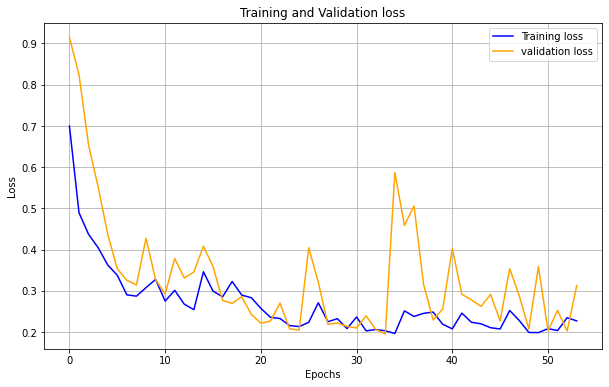

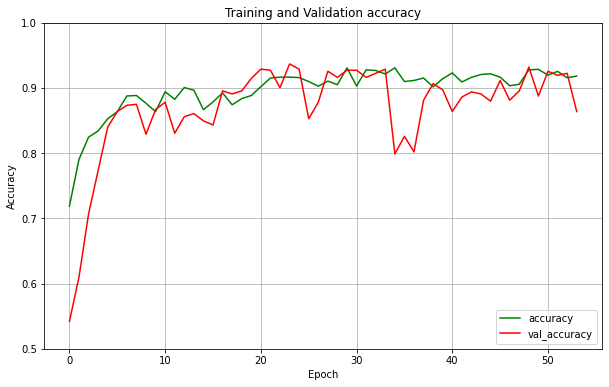

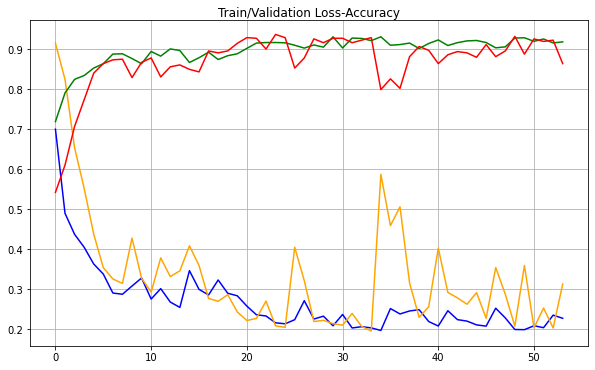

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(H.history['loss'], 'blue', label='Training loss')
plt.plot(H.history['val_loss'], 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#%%
plt.figure(figsize=(10,6))
plt.plot(H.history['accuracy'], 'green', label='accuracy')
plt.plot(H.history['val_accuracy'], 'red', label = 'val_accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue', label="train_loss")
plt.plot(H.history["val_loss"], 'orange',label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
plt.title('Train/Validation Loss-Accuracy', pad=-50)
plt.grid(True)
plt.show()

##**2. Mô hình sử dụng SGD Nesterov Momemtum**

###**2.1. Train model**

In [ ]:
keras.backend.clear_session()

In [ ]:
EPS = 200     #Number of epochs for training 
dropout = 0.3
kernel_init = 'he_normal'
lrate = 0.0001
BS = 32
#Xoá đi mô hình cũ
keras.backend.clear_session()
model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(64, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(96, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(128, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(256, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(384, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(dropout),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Flatten(),
        layers.Dense(512, kernel_initializer=kernel_init, activation='relu'),
        layers.Dense(3, kernel_initializer=kernel_init, activation='softmax')
])

aug = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

# biên dịch model
print("[INFO] compiling model...")
model.compile(loss='categorical_crossentropy', 
              optimizer = SGD(learning_rate=lrate, momentum=0.9, nesterov=True), 
              metrics=["accuracy"])

mc = callbacks.ModelCheckpoint('mask_detector.h5',
                                monitor='val_accuracy', 
                                mode='max', verbose=1, 
                                save_best_only=True)
es = callbacks.EarlyStopping(monitor ="val_loss", 
                                    mode ="min", verbose=1,  patience = 20, 
                                    restore_best_weights = True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
            aug.flow(train_images, train_labels, batch_size=BS),
            validation_data=(validation_images, validation_labels),
            epochs=EPS, callbacks = [es, mc])

[INFO] compiling model...
[INFO] training head...
Epoch 1/200
93/93 [==============================] - 38s 401ms/step - loss: 0.8413 - accuracy: 0.6323 - val_loss: 0.9004 - val_accuracy: 0.6117

Epoch 00001: val_accuracy improved from -inf to 0.61173, saving model to mask_detector.h5
Epoch 2/200
93/93 [==============================] - 37s 394ms/step - loss: 0.6310 - accuracy: 0.7304 - val_loss: 0.7514 - val_accuracy: 0.6910

Epoch 00002: val_accuracy improved from 0.61173 to 0.69097, saving model to mask_detector.h5
Epoch 3/200
93/93 [==============================] - 37s 398ms/step - loss: 0.5683 - accuracy: 0.7620 - val_loss: 0.5779 - val_accuracy: 0.7861

Epoch 00003: val_accuracy improved from 0.69097 to 0.78605, saving model to mask_detector.h5
Epoch 4/200
93/93 [==============================] - 37s 398ms/step - loss: 0.5381 - accuracy: 0.7705 - val_loss: 0.4771 - val_accuracy: 0.8288

Epoch 00004: val_accuracy improved from 0.78605 to 0.82884, saving model to mask_detector.h5
E

###**2.2. Predict test data**

In [ ]:
model = load_model('mask_detector.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("Score test set")
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

[INFO] evaluating network...
                precision    recall  f1-score   support

  correct_mask       0.92      0.97      0.94       276
incorrect_mask       0.93      0.78      0.85       181
  without_mask       0.90      0.97      0.93       172

      accuracy                           0.91       629
     macro avg       0.91      0.91      0.91       629
  weighted avg       0.92      0.91      0.91       629

Score test set
20/20 [==============================] - 2s 50ms/step - loss: 0.2427 - accuracy: 0.9141
score validation set:
20/20 [==============================] - 1s 49ms/step - loss: 0.2134 - accuracy: 0.9398
score training set:
93/93 [==============================] - 5s 50ms/step - loss: 0.1272 - accuracy: 0.9616


###**2.3. Plot training/validation Loss và Accuracy**

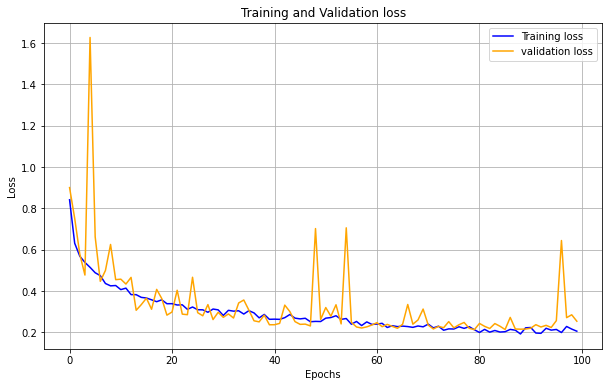

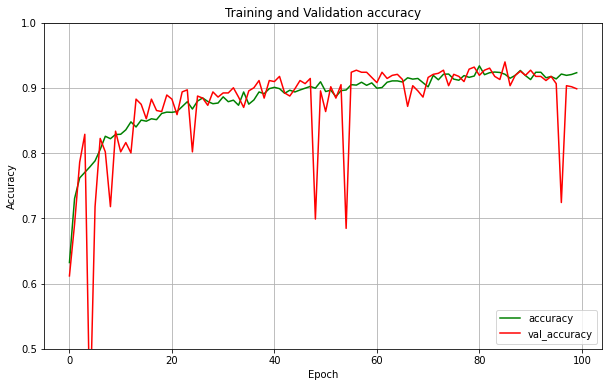

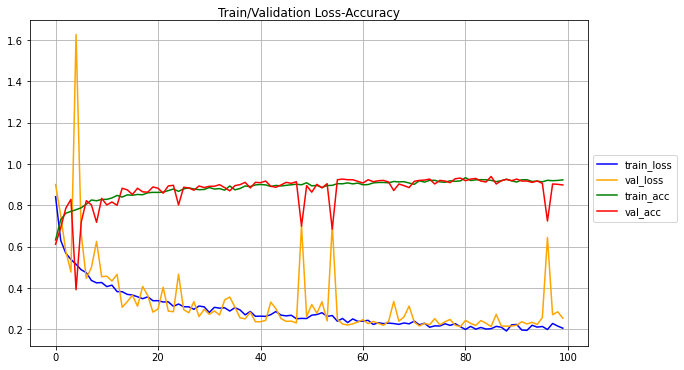

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(H.history['loss'], 'blue', label='Training loss')
plt.plot(H.history['val_loss'], 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#%%
plt.figure(figsize=(10,6))
plt.plot(H.history['accuracy'], 'green', label='accuracy')
plt.plot(H.history['val_accuracy'], 'red', label = 'val_accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue', label="train_loss")
plt.plot(H.history["val_loss"], 'orange',label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
plt.title('Train/Validation Loss-Accuracy', pad=-50)
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

##**3. Đánh giá, nhận xét**


*Biểu đồ và kết quả dự đoán đánh giá của Mô hình sử dụng hàm tối ưu là Adam*

![model_adam_plot](https://drive.google.com/uc?export=view&id=13DIa0VQQ_8sI-U0ow01S7Zj2THNQHjoF)

![model_adam_score](https://drive.google.com/uc?export=view&id=19WbHXcBSHT7f_FyguOhlNNLJO_C1WgK4)

*Biểu đồ và kết quả dự đoán đánh giá của mô hình sử dụng hàm tối ưu là SGD Nesterov Momemtum.*

![model_sgd_plot](https://drive.google.com/uc?export=view&id=1CNrqup-iO8FnTo4EflWz-7-0Y30Rstlj)


![model_sgd_score](https://drive.google.com/uc?export=view&id=1wTgs0ArLGuPbBSj3W3yUnq4xJc1-a5Ye)

*Biểu đồ của đường cong accuracy khi mô hình sử dụng hàm tối ưu là SGD Nesterov Momemtum*
![model_sgd_plot_acc](https://drive.google.com/uc?export=view&id=1SKl3ClIc_mVvl2wGIFBJ8WQfkZQRId00)

Việc sử dụng EarlyStopping với ```patience = 20```, thì sau 20 epoch mà mô hình chưa có cải thiện thì việc đào tạo vẽ kết thúc. 

Nhóm em có một số đánh giá và nhận xét sau:

1. Thứ nhất có thể thấy một đặc điểm chung là ở cả 2 mô hình là đường cong validation loss khá nhiễu xung quanh đường training loss. Lý giải cho việc này là do khi sử dụng ImageGenerator thì tập train được tăng cường thêm nhiều dữ liệu với độ đa dạng bằng cách xoay, phóng to,... ảnh. Trong khi đó, tập validation chỉ là những mặt người được cắt ra đơn thuần nên không thể hiện hết những thông tin để mô hình có thể dự đoán tốt.

2. Thời gian dừng (hoặc có thể hiểu là tiến tới hội tụ) của SGD Nesterov Momemtum lâu hơn là Adam. Trong khi mỗi bước nhảy của Adam lớn, nên giá trị loss của tập training giảm xuống nhanh hơn là SGD..

3. Các giá trị loss và accuracy của tập training với validation không chênh lệch nhau quá nhiều nhưng giá trị này không tốt hơn khi chưa áp dụng kĩ thuật ImageGenerator. Cụ thể có thể thấy khi áp dụng ImageGenerator thì loss cao hơn và accuracy thấp hơn những lần thử nghiệm trước khi chưa áp dụng ImageGenerator:
  - Trước khi áp dụng: 
    - Adam: loss_train= 0.0232, acc_train = 0.9996, loss_val = 0.1586, acc_val = 0.9461

    - SGD NM: loss_train= 0.0578, acc_train = 0.9966, loss_val = 0.1854, acc_val = 0.9414 

  - Sau khi áp dụng ImageGenerator:
    - Adam: loss_train= 0.1351, acc_train = 0.9565, loss_val = 0.2084, acc_val = 0.9366

    - SGD NM: loss_train= 0.1272, acc_train = 0.9616, loss_val = 0.2134, acc_val = 0.9398

  Rõ ràng trước khi áp dụng thì giá trị loss trên tập train rất nhỏ, còn accuracy thì gần như hoàn hảo (bằng 1). Tuy nhiên khoảng chênh lệch các giá trị loss và accuracy giữa 2 tập train và validation của mô hình trước khi áp dụng lại lớn hơn nhiều so với mô hình khi áp dụng ImageGenerator. Cụ thể:
  - Trước khi áp dụng: 
    - Adam: distance_loss = 0.1586 - 0.0232 = 0.1358; distance_acc = |0.9461 - 0.9996| = 0.0535

    - SGD NM: distance_loss = 0.1854 - 0.0578 = 0.1276; distance_acc = |0.9414 - 0.9966| = 0.0552.

  - Sau khi áp dụng ImageGenerator:
     - Adam: distance_loss = 0.2084 - 0.1351 = 0.0733; distance_acc = |0.9366 - 0.9565| = 0.0199

    - SGD NM: distance_loss = 0.2134 - 0.1272 = 0.0862; distance_acc = |0.9398 - 0.9616| = 0.0218.

  Khoảng cách chênh lệch của loss, accuracy của khi chưa áp dụng (0.1358, 0.0535) và khi áp dụng ImageGenerator (0.0733, 0.0199) (Adam) chênh nhau khá lớn. Tuy những giá trị loss và accuracy trên cả train và validation khi chưa áp dụng ImageGenerator nhìn thấy rất khả quan nhưng sự thật thì nó đang chênh lệch nhau khá lớn, nên việc mô hình đang có dấu hiệu overfit.

  Ngược lại khi sử dụng ImageGenerator dù kết quả loss, accuracy không tốt bằng lúc chưa áp dụng, nhưng mô hình đã khắc phục được vấn đề overfit. Đó mới là vấn đề cần quan tâm, bởi những dữ liệu thực tế khác xa so với những trường hợp quá "hoàn hảo" của tập train của nhóm. Cho nên dù giá trị loss, accuracy và kể cả những dự đoán về f1_score trên tập test cũng thấp hơn nhưng nhóm em vẫn đánh giá mô hình cuối chùng ở bước hoàn thiện này tốt nhất trong quá trình cải thiện.

4. Cuối cùng là trong 2 mô hình sử dụng hàm tối ưu là Adam và SGD Nesterov Momemtum trong phần hoàn thiện này thì nhóm em sẽ chọn mô hình sử dụng Adam, bởi một số lý do sau:
 - Thời gian tiến gần tới hội tụ của Adam nhanh hơn SGD NM.
 - Dựa vào kết quả dự đoán precision, recall, f1_score của Adam tốt hơn.
 - Dựa vào kết quả đánh giá trị loss và accuracy trên tập test của Adam cũng tốt hơn SGD NM.


   



#**VIII. PHỤ LỤC**

##**1. Lựa chọn mô hình cơ sở**

Trong thử nghiệm này, nhóm em so sánh trên các giá trị loss và accuracy của cả 3 tập test, validation và train. Do đây mới là thử nghiệm nhằm chọn một mô hình trong 3 mô hình đề xuất trên để chon được 1 mô hình và tiến hành tối ưu hóa, cải thiện mô hình đó.

**Lưu ý:** *Việc thử nghiệm nhóm em không sử dụng bất kì một phương pháp tối ưu hóa hay cải thiện nào để đào tạo mô hình. Đây đều là những cái cơ bản nhất của việc tạo ra một mô hình CNN.*

In [ ]:
#Danh sách chứa các model
list_model =[model_1, model_2, model_3]
score_val_loss = []     #lưu giá trị validation loss
score_val_acc = []      #lưu giá trị validation accuracy
score_train_loss = []   #lưu giá trị training loss
score_train_acc = []    #lưu giá trị training accuracy

In [ ]:
def train_model(model):
  opt = Adam(learning_rate=INIT_LR)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # huấn luyện fc
  print("[INFO] training head...")
  H = model.fit(
        train_images, train_labels, batch_size=BS,
        validation_data=(validation_images, validation_labels),
        epochs=EPS)
  
  return model

Nhóm em chọn hàm tối ưu là **Adam** và hàm loss là **Multi-Class Cross-Entropy**. Với giá trị ```learning rate = 0.001 = 1e-3``` để bắt đầu thử nghiệm các mô hình của mình.

In [ ]:
EPS=30
INIT_LR = 1e-3
BS = 32

for i in range(3):
  model = train_model(list_model[i])

  # make predictions on the testing set
  print("[INFO] evaluating test set model_{j}...".format(j=i+1))
  predIdxs = model.predict(test_images, batch_size=BS)
  predIdxs = np.argmax(predIdxs, axis=1)
  print(classification_report(test_labels.argmax(axis=1), predIdxs,
      target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

  print ("score validation set:")
  validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
  print ("score training set:")
  train_loss, train_acc = model.evaluate(train_images,  train_labels)

  score_val_loss.append(validation_loss)
  score_val_acc.append(validation_acc)
  score_train_loss.append(train_loss)
  score_train_acc.append(train_acc)

  print ("Xoá đi mô hình cũ")
  keras.backend.clear_session()
  print("done")

[INFO] training head...
Epoch 1/30
93/93 [==============================] - 41s 117ms/step - loss: 1.0646 - accuracy: 0.7487 - val_loss: 0.3868 - val_accuracy: 0.8732
Epoch 2/30
93/93 [==============================] - 10s 106ms/step - loss: 0.3879 - accuracy: 0.8550 - val_loss: 0.3224 - val_accuracy: 0.8906
Epoch 3/30
93/93 [==============================] - 10s 106ms/step - loss: 0.3358 - accuracy: 0.8778 - val_loss: 0.3897 - val_accuracy: 0.8494
Epoch 4/30
93/93 [==============================] - 10s 105ms/step - loss: 0.3422 - accuracy: 0.8723 - val_loss: 0.5772 - val_accuracy: 0.8336
Epoch 5/30
93/93 [==============================] - 10s 105ms/step - loss: 0.4107 - accuracy: 0.8564 - val_loss: 0.2825 - val_accuracy: 0.8922
Epoch 6/30
93/93 [==============================] - 10s 105ms/step - loss: 0.2724 - accuracy: 0.8971 - val_loss: 0.2887 - val_accuracy: 0.8922
Epoch 7/30
93/93 [==============================] - 10s 105ms/step - loss: 0.2222 - accuracy: 0.9209 - val_loss: 0.259

In [ ]:
model_name =['model_1', 'model_2', 'model_3']
d = {'model name': model_name,
     'validation loss': score_val_loss,
     'validation accuracy': score_val_acc,
     'training loss': score_train_loss,
     'training accuracy': score_train_acc}

df = pd.DataFrame(data=d)
df.to_csv('/content/score_compare_model_impl.csv')
df

,model name,validation loss,validation accuracy,training loss,training accuracy
0,model_1,0.300658,0.922345,0.035984,0.987776
1,model_2,0.628636,0.906498,0.047567,0.980985
2,model_3,0.312725,0.889065,0.117477,0.963328


**Code Barplot score chọn mô hình cơ sở**

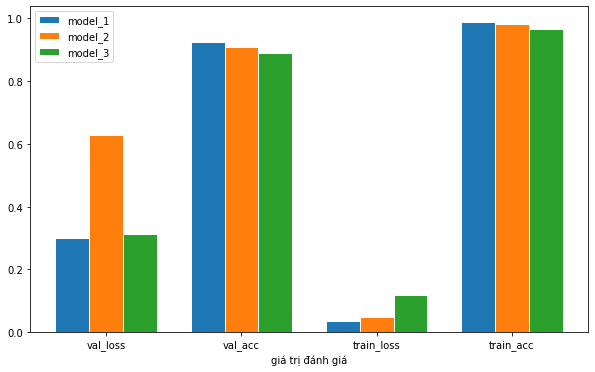

In [ ]:
labels = ['val_loss', 'val_acc', 'train_loss', 'train_acc']
model_1 = [0.300658,	0.922345,	0.035984,	0.987776]
model_2 = [0.628636,	0.906498,	0.047567,	0.980985]
model_3 = [0.312725,	0.889065,	0.117477,	0.963328]

barWidth = 0.25
r1 = np.arange(len(model_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10,6))
# Make the plot
plt.bar(r1, model_1, width=barWidth, edgecolor='white', label='model_1')
plt.bar(r2, model_2, width=barWidth, edgecolor='white', label='model_2')
plt.bar(r3, model_3, width=barWidth, edgecolor='white', label='model_3')
 
# Add xticks on the middle of the group bars
plt.xlabel('giá trị đánh giá')
plt.xticks([r + barWidth for r in range(len(model_1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()


##**2. Code kết hợp Dropout,EarlyStopping, ModelCheckpoint**


In [ ]:
#Xoá đi mô hình cũ
keras.backend.clear_session()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    #layers.Dropout(0.8),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    #layers.Dropout(0.5),
    layers.Conv2D(96, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    #layers.Dropout(0.5),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    #layers.Dropout(0.5),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    #layers.Dropout(0.5),
    layers.Conv2D(384, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

[INFO] training head...
Epoch 1/100
93/93 [==============================] - 7s 60ms/step - loss: 1.1929 - accuracy: 0.6621 - val_loss: 0.3873 - val_accuracy: 0.8494

Epoch 00001: val_accuracy improved from -inf to 0.84945, saving model to mask_detector_improve.h5
Epoch 2/100
93/93 [==============================] - 5s 50ms/step - loss: 0.4662 - accuracy: 0.8248 - val_loss: 0.3656 - val_accuracy: 0.8558

Epoch 00002: val_accuracy improved from 0.84945 to 0.85578, saving model to mask_detector_improve.h5
Epoch 3/100
93/93 [==============================] - 5s 51ms/step - loss: 0.4529 - accuracy: 0.8377 - val_loss: 0.3556 - val_accuracy: 0.8653

Epoch 00003: val_accuracy improved from 0.85578 to 0.86529, saving model to mask_detector_improve.h5
Epoch 4/100
93/93 [==============================] - 5s 50ms/step - loss: 0.3500 - accuracy: 0.8716 - val_loss: 0.3669 - val_accuracy: 0.8732

Epoch 00004: val_accuracy improved from 0.86529 to 0.87322, saving model to mask_detector_improve.h5
Epo

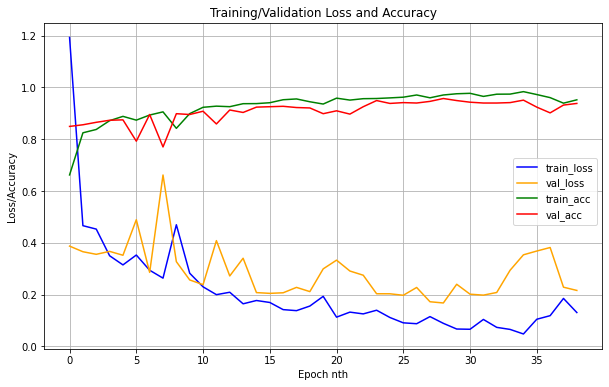

In [ ]:
EPS=100
INIT_LR = 0.001
BS = 32

# biên dịch model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_improve.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	train_images, train_labels, batch_size=BS,
    	validation_data=(validation_images, validation_labels),
    	epochs=EPS, callbacks = [es, mc])

model = load_model('mask_detector_improve.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

##**3. Code Mô hình thêm Batch Normalization**

###**3.1. CONV -> BatchNorm -> ReLu -> MaxPool**

In [ ]:
#Xoá đi mô hình cũ
keras.backend.clear_session()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(64, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(96, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(128, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(256, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(384, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0

[INFO] training head...
Epoch 1/100
93/93 [==============================] - 8s 79ms/step - loss: 0.5175 - accuracy: 0.8048 - val_loss: 0.6355 - val_accuracy: 0.7084

Epoch 00001: val_accuracy improved from -inf to 0.70840, saving model to mask_detector_BN.h5
Epoch 2/100
93/93 [==============================] - 7s 76ms/step - loss: 0.3054 - accuracy: 0.8866 - val_loss: 0.4277 - val_accuracy: 0.8431

Epoch 00002: val_accuracy improved from 0.70840 to 0.84311, saving model to mask_detector_BN.h5
Epoch 3/100
93/93 [==============================] - 7s 76ms/step - loss: 0.2571 - accuracy: 0.9049 - val_loss: 0.2772 - val_accuracy: 0.9002

Epoch 00003: val_accuracy improved from 0.84311 to 0.90016, saving model to mask_detector_BN.h5
Epoch 4/100
93/93 [==============================] - 7s 76ms/step - loss: 0.2904 - accuracy: 0.8852 - val_loss: 0.3345 - val_accuracy: 0.8653

Epoch 00004: val_accuracy did not improve from 0.90016
Epoch 5/100
93/93 [==============================] - 7s 76ms/ste

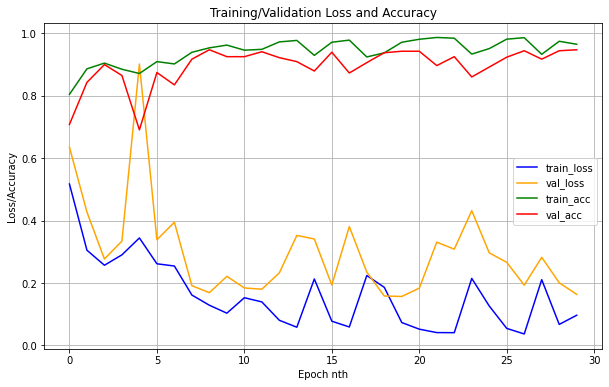

In [ ]:
EPS=100
INIT_LR = 0.001
BS = 32

# biên dịch model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_BN.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	train_images, train_labels, batch_size=BS,
    	validation_data=(validation_images, validation_labels),
    	epochs=EPS, callbacks = [es, mc])

model = load_model('mask_detector_BN.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

###**3.2. CONV -> ReLu -> BatchNorm -> MaxPool**

In [ ]:
#Xoá đi mô hình cũ
keras.backend.clear_session()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(64, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(96, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(128, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(256, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(384, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      2

[INFO] training head...
Epoch 1/100
93/93 [==============================] - 7s 70ms/step - loss: 0.6048 - accuracy: 0.7993 - val_loss: 0.4239 - val_accuracy: 0.8352

Epoch 00001: val_accuracy improved from -inf to 0.83518, saving model to mask_detector_BN_2.h5
Epoch 2/100
93/93 [==============================] - 6s 68ms/step - loss: 0.3376 - accuracy: 0.8832 - val_loss: 0.3297 - val_accuracy: 0.8986

Epoch 00002: val_accuracy improved from 0.83518 to 0.89857, saving model to mask_detector_BN_2.h5
Epoch 3/100
93/93 [==============================] - 6s 68ms/step - loss: 0.2672 - accuracy: 0.9032 - val_loss: 0.8426 - val_accuracy: 0.8177

Epoch 00003: val_accuracy did not improve from 0.89857
Epoch 4/100
93/93 [==============================] - 6s 69ms/step - loss: 0.2366 - accuracy: 0.9110 - val_loss: 0.2267 - val_accuracy: 0.9128

Epoch 00004: val_accuracy improved from 0.89857 to 0.91284, saving model to mask_detector_BN_2.h5
Epoch 5/100
93/93 [==============================] - 6s 69

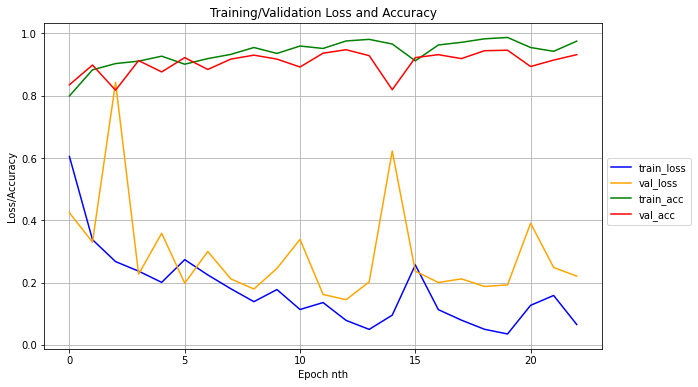

In [ ]:
EPS=100
INIT_LR = 0.001
BS = 32

# biên dịch model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_BN_2.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	train_images, train_labels, batch_size=BS,
    	validation_data=(validation_images, validation_labels),
    	epochs=EPS, callbacks = [es, mc])

model = load_model('mask_detector_BN_2.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

##**4. Code Mô hình khi kết hợp Batch Normalization và Dropout**

###**4.1. CONV -> BatchNorm -> ReLu -> Dropout -> MaxPool**

In [ ]:
#Xoá đi mô hình cũ
keras.backend.clear_session()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(64, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(96, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(128, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(256, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(384, kernel_size=(3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0

[INFO] training head...
Epoch 1/100
93/93 [==============================] - 8s 80ms/step - loss: 0.5670 - accuracy: 0.7966 - val_loss: 2.8083 - val_accuracy: 0.3201

Epoch 00001: val_accuracy improved from -inf to 0.32013, saving model to mask_detector_combine_BN-Dr.h5
Epoch 2/100
93/93 [==============================] - 7s 76ms/step - loss: 0.3398 - accuracy: 0.8767 - val_loss: 0.3291 - val_accuracy: 0.8875

Epoch 00002: val_accuracy improved from 0.32013 to 0.88748, saving model to mask_detector_combine_BN-Dr.h5
Epoch 3/100
93/93 [==============================] - 7s 76ms/step - loss: 0.2586 - accuracy: 0.8992 - val_loss: 0.2543 - val_accuracy: 0.9097

Epoch 00003: val_accuracy improved from 0.88748 to 0.90967, saving model to mask_detector_combine_BN-Dr.h5
Epoch 4/100
93/93 [==============================] - 7s 76ms/step - loss: 0.3077 - accuracy: 0.8862 - val_loss: 0.2455 - val_accuracy: 0.9192

Epoch 00004: val_accuracy improved from 0.90967 to 0.91918, saving model to mask_detec

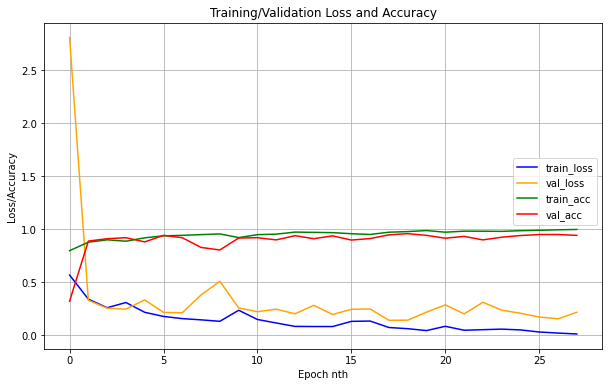

In [ ]:
EPS=100
INIT_LR = 0.001
BS = 32

# biên dịch model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_combine_BN-Dr.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	train_images, train_labels, batch_size=BS,
    	validation_data=(validation_images, validation_labels),
    	epochs=EPS, callbacks = [es, mc])

model = load_model('mask_detector_combine_BN-Dr.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

###**4.2. CONV -> ReLu -> Dropout -> BatchNorm -> MaxPool**

In [ ]:
#Xoá đi mô hình cũ
keras.backend.clear_session()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(64, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(96, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(128, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Conv2D(256, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Conv2D(384, kernel_size=(3, 3)),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      2

[INFO] training head...
Epoch 1/100
93/93 [==============================] - 7s 71ms/step - loss: 0.5855 - accuracy: 0.7915 - val_loss: 0.6784 - val_accuracy: 0.6688

Epoch 00001: val_accuracy improved from -inf to 0.66878, saving model to mask_detector_combine_BN-Dr_2.h5
Epoch 2/100
93/93 [==============================] - 6s 68ms/step - loss: 0.3901 - accuracy: 0.8635 - val_loss: 0.3729 - val_accuracy: 0.8621

Epoch 00002: val_accuracy improved from 0.66878 to 0.86212, saving model to mask_detector_combine_BN-Dr_2.h5
Epoch 3/100
93/93 [==============================] - 6s 68ms/step - loss: 0.2816 - accuracy: 0.8971 - val_loss: 0.2339 - val_accuracy: 0.9081

Epoch 00003: val_accuracy improved from 0.86212 to 0.90808, saving model to mask_detector_combine_BN-Dr_2.h5
Epoch 4/100
93/93 [==============================] - 6s 68ms/step - loss: 0.2615 - accuracy: 0.9005 - val_loss: 0.2980 - val_accuracy: 0.8827

Epoch 00004: val_accuracy did not improve from 0.90808
Epoch 5/100
93/93 [======

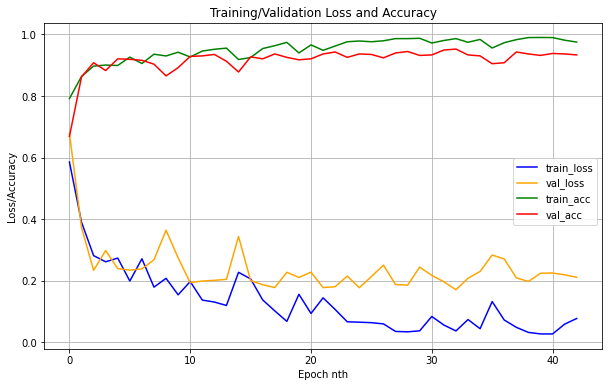

In [ ]:
EPS=100
INIT_LR = 0.001
BS = 32

# biên dịch model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_combine_BN-Dr_2.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)

# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	train_images, train_labels, batch_size=BS,
    	validation_data=(validation_images, validation_labels),
    	epochs=EPS, callbacks = [es, mc])

model = load_model('mask_detector_combine_BN-Dr_2.h5')
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

##**5. Code So sánh Adam và SGD Nesterov Momentum**

learning rate:  0.1
optimizer function:  Adam
[INFO] compiling model...
[INFO] training head...
Epoch 1/200
93/93 [==============================] - 8s 82ms/step - loss: 16.8317 - accuracy: 0.4173 - val_loss: 1.6106 - val_accuracy: 0.4184

Epoch 00001: val_accuracy improved from -inf to 0.41838, saving model to mask_detector_0.1_Adam.h5
Epoch 2/200
93/93 [==============================] - 7s 78ms/step - loss: 1.0025 - accuracy: 0.5205 - val_loss: 0.8528 - val_accuracy: 0.5848

Epoch 00002: val_accuracy improved from 0.41838 to 0.58479, saving model to mask_detector_0.1_Adam.h5
Epoch 3/200
93/93 [==============================] - 7s 78ms/step - loss: 0.7491 - accuracy: 0.6540 - val_loss: 0.6708 - val_accuracy: 0.7448

Epoch 00003: val_accuracy improved from 0.58479 to 0.74485, saving model to mask_detector_0.1_Adam.h5
Epoch 4/200
93/93 [==============================] - 7s 79ms/step - loss: 0.7890 - accuracy: 0.6706 - val_loss: 0.8154 - val_accuracy: 0.7084

Epoch 00004: val_accuracy di

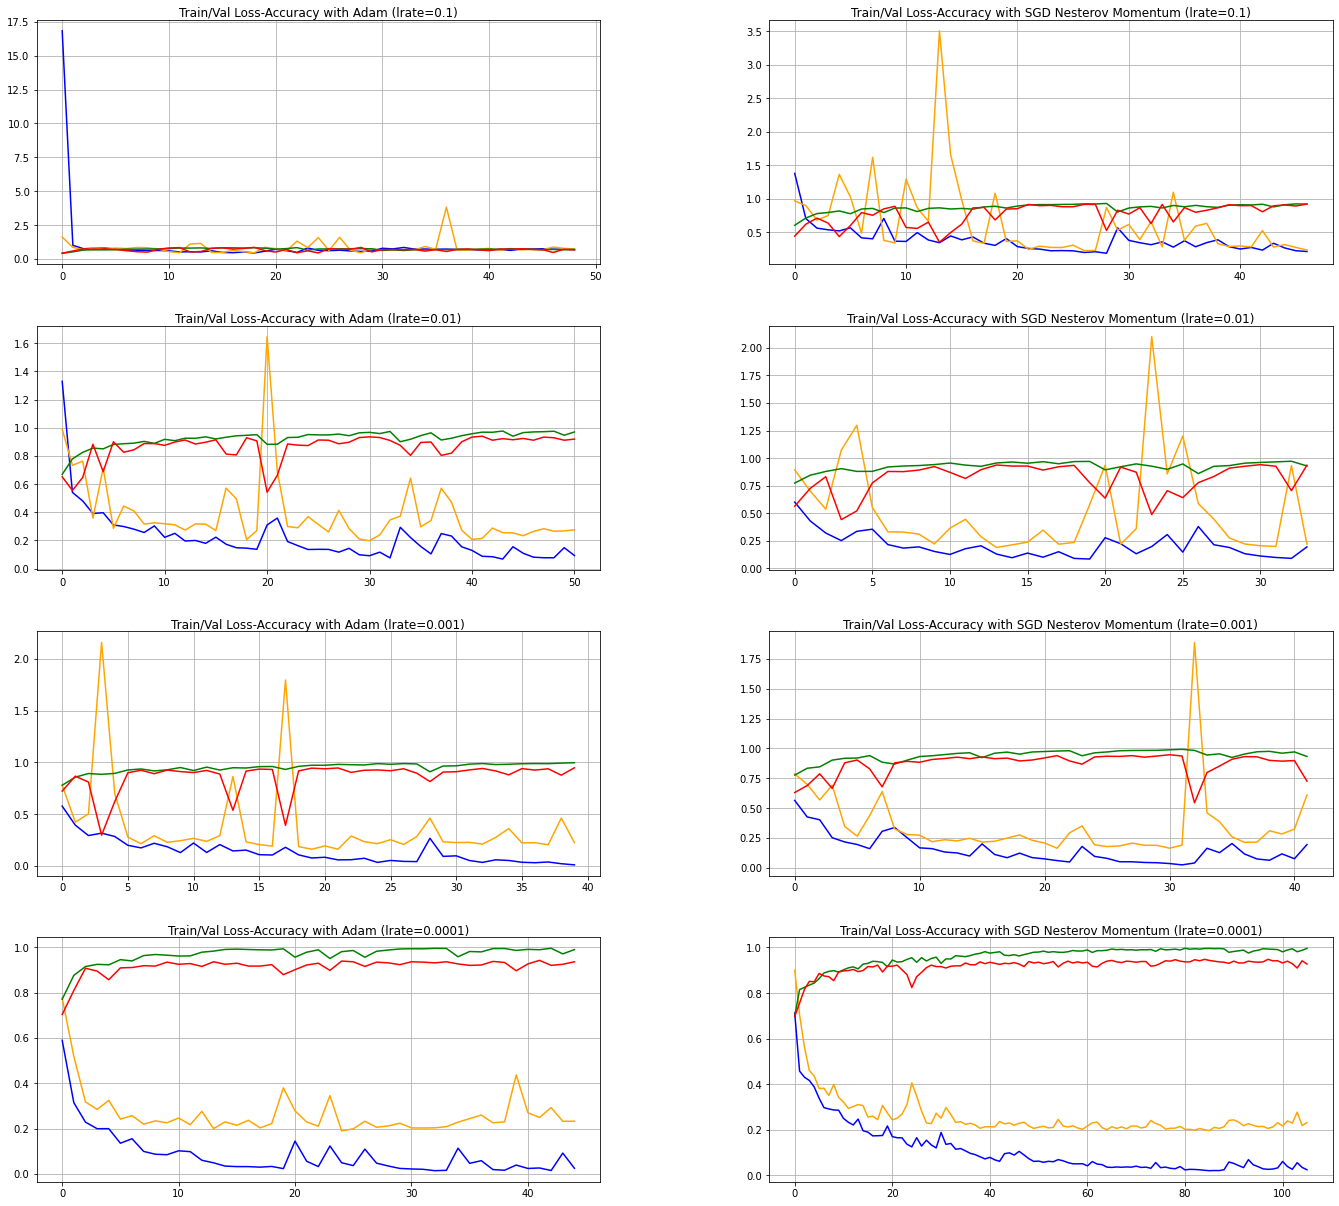

In [ ]:

EPS = 200     #Number of epochs for training
BS = 32         #Training Batch Size
plt.figure(figsize=(15,6))

learning_rate = [0.1,0.01,0.001,0.0001]
name_opt = ['Adam', 'SGDNesterovMomentum']

x = -2
for i in range(4):
  INIT_LR = learning_rate[i]
  print ('learning rate: ', INIT_LR)
  x += 2
  for j in range(2):
    #Xoá đi mô hình cũ
    keras.backend.clear_session()

    model = models.Sequential([
      layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),

      layers.Conv2D(64, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),
      
      layers.Conv2D(96, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),
      
      layers.Conv2D(128, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),
      
      layers.Conv2D(256, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),

      layers.Conv2D(384, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.Dropout(0.5),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),

      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dense(3, activation='softmax')
    ])
    if j == 0:
      opt = Adam(learning_rate=INIT_LR)
    else:
      opt = SGD(learning_rate=INIT_LR, momentum=0.9, nesterov=True)

    print ("optimizer function: ", name_opt[j])

    # biên dịch model
    print("[INFO] compiling model...")
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

    mc = callbacks.ModelCheckpoint('mask_detector_{lr}_{opt}.h5'.format(lr=INIT_LR, opt=name_opt[j]),
                                  monitor='val_accuracy', 
                                  mode='max', verbose=1, 
                                  save_best_only=True)
    es = callbacks.EarlyStopping(monitor ="val_loss", 
                                  mode ="min", verbose=1,  patience = 20, 
                                  restore_best_weights = True)

    # huấn luyện fc
    print("[INFO] training head...")
    H = model.fit(
          train_images, train_labels, batch_size=BS,
          validation_data=(validation_images, validation_labels),
          epochs=EPS, callbacks =[mc,es])

    model = load_model('mask_detector_{lr}_{opt}.h5'.format(lr=INIT_LR, opt=name_opt[j]))
    # make predictions on the testing set
    print("[INFO] evaluating test set {lr}_{opt}...".format(lr=INIT_LR, opt=name_opt[j]))
    predIdxs = model.predict(test_images, batch_size=BS)
    predIdxs = np.argmax(predIdxs, axis=1)
    print(classification_report(test_labels.argmax(axis=1), predIdxs,
      target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

    print ("score test set:")
    test_loss, test_acc = model.evaluate(test_images,  test_labels)
    print ("score validation set:")
    validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
    print ("score training set:")
    train_loss, train_acc = model.evaluate(train_images,  train_labels)

    if j == 0:
      plt.subplot(421 + x)
      plt.plot(H.history["loss"], 'blue', label="train_loss")
      plt.plot(H.history["val_loss"], 'orange',label="val_loss")
      plt.plot(H.history["accuracy"], 'green', label="train_acc")
      plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
      plt.title('Train/Val Loss-Accuracy with Adam (lrate='+str(INIT_LR)+')', pad=-50)
      plt.grid(True)
          
    if j == 1:
      plt.subplot(421 + x+1)
      plt.plot(H.history["loss"], 'blue', label="train_loss")
      plt.plot(H.history["val_loss"], 'orange',label="val_loss")
      plt.plot(H.history["accuracy"], 'green', label="train_acc")
      plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
      plt.title('Train/Val Loss-Accuracy with SGD Nesterov Momentum (lrate='+str(INIT_LR)+')', pad=-50)
      plt.grid(True)


plt.subplots_adjust(top=2.7, bottom=0.01, left=0.05, right=1.25, hspace=0.25,wspace=0.30)
plt.savefig("plot_compare_optimizer.png")
plt.show()

##**6. Code Điều chỉnh siêu tham số**

###**6.1. Code Điều chỉnh siêu tham số liên quan đến kiến trúc mạng**

dropout_rate:  0.2
kernel_initialization: he_normal _dropout_rate:  0.2
[INFO] compiling model...
[INFO] training head...
Epoch 1/200
93/93 [==============================] - 8s 79ms/step - loss: 0.5507 - accuracy: 0.8098 - val_loss: 0.5051 - val_accuracy: 0.8098

Epoch 00001: val_accuracy improved from -inf to 0.80983, saving model to mask_detector_0.2_he_normal.h5
Epoch 2/200
93/93 [==============================] - 7s 76ms/step - loss: 0.3752 - accuracy: 0.8594 - val_loss: 0.7085 - val_accuracy: 0.7068

Epoch 00002: val_accuracy did not improve from 0.80983
Epoch 3/200
93/93 [==============================] - 7s 76ms/step - loss: 0.2862 - accuracy: 0.8910 - val_loss: 0.3272 - val_accuracy: 0.8875

Epoch 00003: val_accuracy improved from 0.80983 to 0.88748, saving model to mask_detector_0.2_he_normal.h5
Epoch 4/200
93/93 [==============================] - 7s 76ms/step - loss: 0.2758 - accuracy: 0.9025 - val_loss: 0.3909 - val_accuracy: 0.8605

Epoch 00004: val_accuracy did not improv

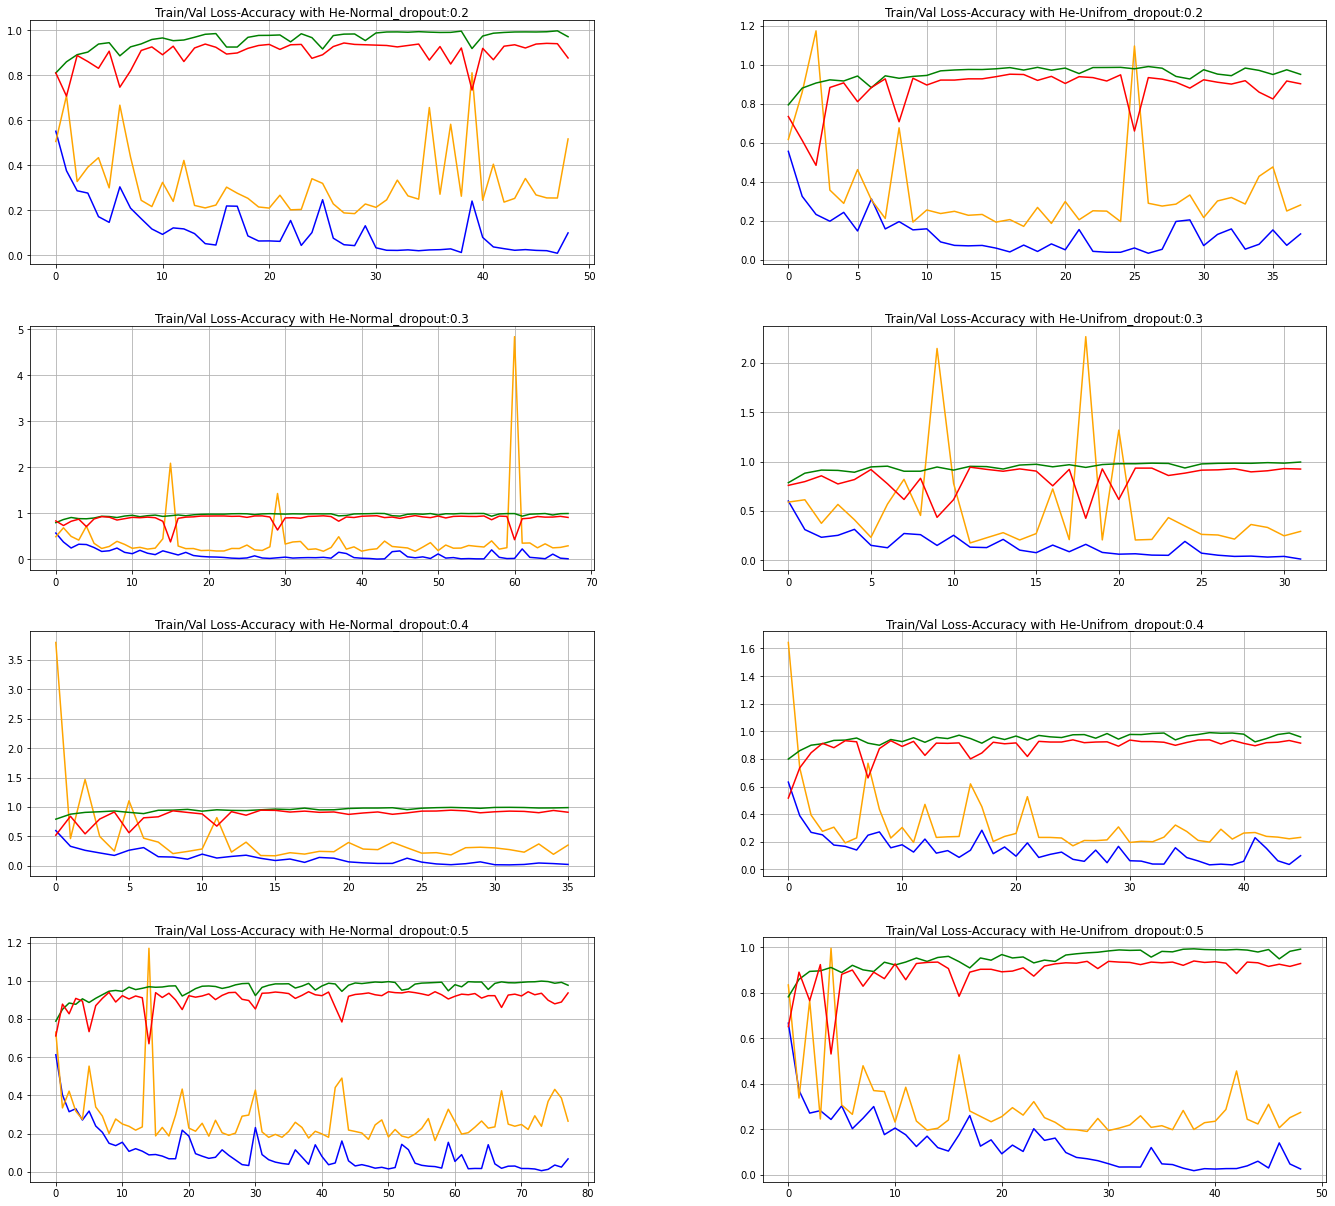

In [ ]:
EPS = 200     #Number of epochs for training
BS = 32         #Training Batch Size
plt.figure(figsize=(15,6))

dropout_rate = [0.2,0.3,0.4,0.5]
kernel_initialization = ['he_normal', 'he_uniform']

x = -2
for i in range(4):
  dropout = dropout_rate[i]
  print ('dropout_rate: ', dropout)
  x += 2
  for j in range(2):
    init = kernel_initialization[j]
    print ('kernel_initialization:', init, '_dropout_rate: ', dropout)
    #Xoá đi mô hình cũ
    keras.backend.clear_session()

    model = models.Sequential([
      layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),

      layers.Conv2D(64, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),
      
      layers.Conv2D(96, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),
      
      layers.Conv2D(128, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),
      
      layers.Conv2D(256, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),

      layers.Conv2D(384, kernel_size=(3, 3)),
      layers.BatchNormalization(),
      layers.Activation("relu"),
      layers.Dropout(dropout),
      layers.MaxPooling2D(pool_size=(2, 2),strides=2),

      layers.Flatten(),
      layers.Dense(512, kernel_initializer=init, activation='relu'),
      layers.Dense(3, kernel_initializer=init, activation='softmax')
    ])

    # biên dịch model
    print("[INFO] compiling model...")
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

    mc = callbacks.ModelCheckpoint('mask_detector_{dp}_{ki}.h5'.format(dp=dropout, ki=init),
                                  monitor='val_accuracy', 
                                  mode='max', verbose=1, 
                                  save_best_only=True)
    es = callbacks.EarlyStopping(monitor ="val_loss", 
                                  mode ="min", verbose=1,  patience = 20, 
                                  restore_best_weights = True)

    # huấn luyện fc
    print("[INFO] training head...")
    H = model.fit(
          train_images, train_labels, batch_size=BS,
          validation_data=(validation_images, validation_labels),
          epochs=EPS, callbacks =[mc,es])

    model = load_model('mask_detector_{dp}_{ki}.h5'.format(dp=dropout, ki=init))
    # make predictions on the testing set
    print("[INFO] evaluating test set {dp}_{ki}....".format(dp=dropout, ki=init))
    predIdxs = model.predict(test_images, batch_size=BS)
    predIdxs = np.argmax(predIdxs, axis=1)
    print(classification_report(test_labels.argmax(axis=1), predIdxs,
      target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

    print ("score test set:")
    test_loss, test_acc = model.evaluate(test_images,  test_labels)
    print ("score validation set:")
    validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
    print ("score training set:")
    train_loss, train_acc = model.evaluate(train_images,  train_labels)

    if j == 0:
      plt.subplot(421 + x)
      plt.plot(H.history["loss"], 'blue', label="train_loss")
      plt.plot(H.history["val_loss"], 'orange',label="val_loss")
      plt.plot(H.history["accuracy"], 'green', label="train_acc")
      plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
      plt.title('Train/Val Loss-Accuracy with He-Normal_dropout:{dp}'.format(dp=dropout), pad=-50)
      plt.grid(True)
          
    if j == 1:
      plt.subplot(421 + x+1)
      plt.plot(H.history["loss"], 'blue', label="train_loss")
      plt.plot(H.history["val_loss"], 'orange',label="val_loss")
      plt.plot(H.history["accuracy"], 'green', label="train_acc")
      plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
      plt.title('Train/Val Loss-Accuracy with He-Unifrom_dropout:{dp}'.format(dp=dropout), pad=-50)
      plt.grid(True)

    print ("\n========================================\n")


plt.subplots_adjust(top=2.7, bottom=0.01, left=0.05, right=1.25, hspace=0.25,wspace=0.30)
plt.savefig("plot_turning_structure.png")
plt.show()

###**6.2. Code Điều chỉnh siêu tham số liên quan đến thuật toán**

0: batch size:32_learning rate:0.001_optimizer:Adam
[INFO] compiling model...
[INFO] training head...
Epoch 1/200
93/93 [==============================] - 40s 87ms/step - loss: 0.5534 - accuracy: 0.8034 - val_loss: 0.8024 - val_accuracy: 0.6434

Epoch 00001: val_accuracy improved from -inf to 0.64342, saving model to 0_mask_detector_32_0.001_Adam.h5
Epoch 2/200
93/93 [==============================] - 7s 79ms/step - loss: 0.3608 - accuracy: 0.8584 - val_loss: 0.4521 - val_accuracy: 0.8146

Epoch 00002: val_accuracy improved from 0.64342 to 0.81458, saving model to 0_mask_detector_32_0.001_Adam.h5
Epoch 3/200
93/93 [==============================] - 7s 79ms/step - loss: 0.3526 - accuracy: 0.8754 - val_loss: 1.7580 - val_accuracy: 0.3265

Epoch 00003: val_accuracy did not improve from 0.81458
Epoch 4/200
93/93 [==============================] - 7s 79ms/step - loss: 0.2412 - accuracy: 0.9134 - val_loss: 0.4293 - val_accuracy: 0.8225

Epoch 00004: val_accuracy improved from 0.81458 to 0.82

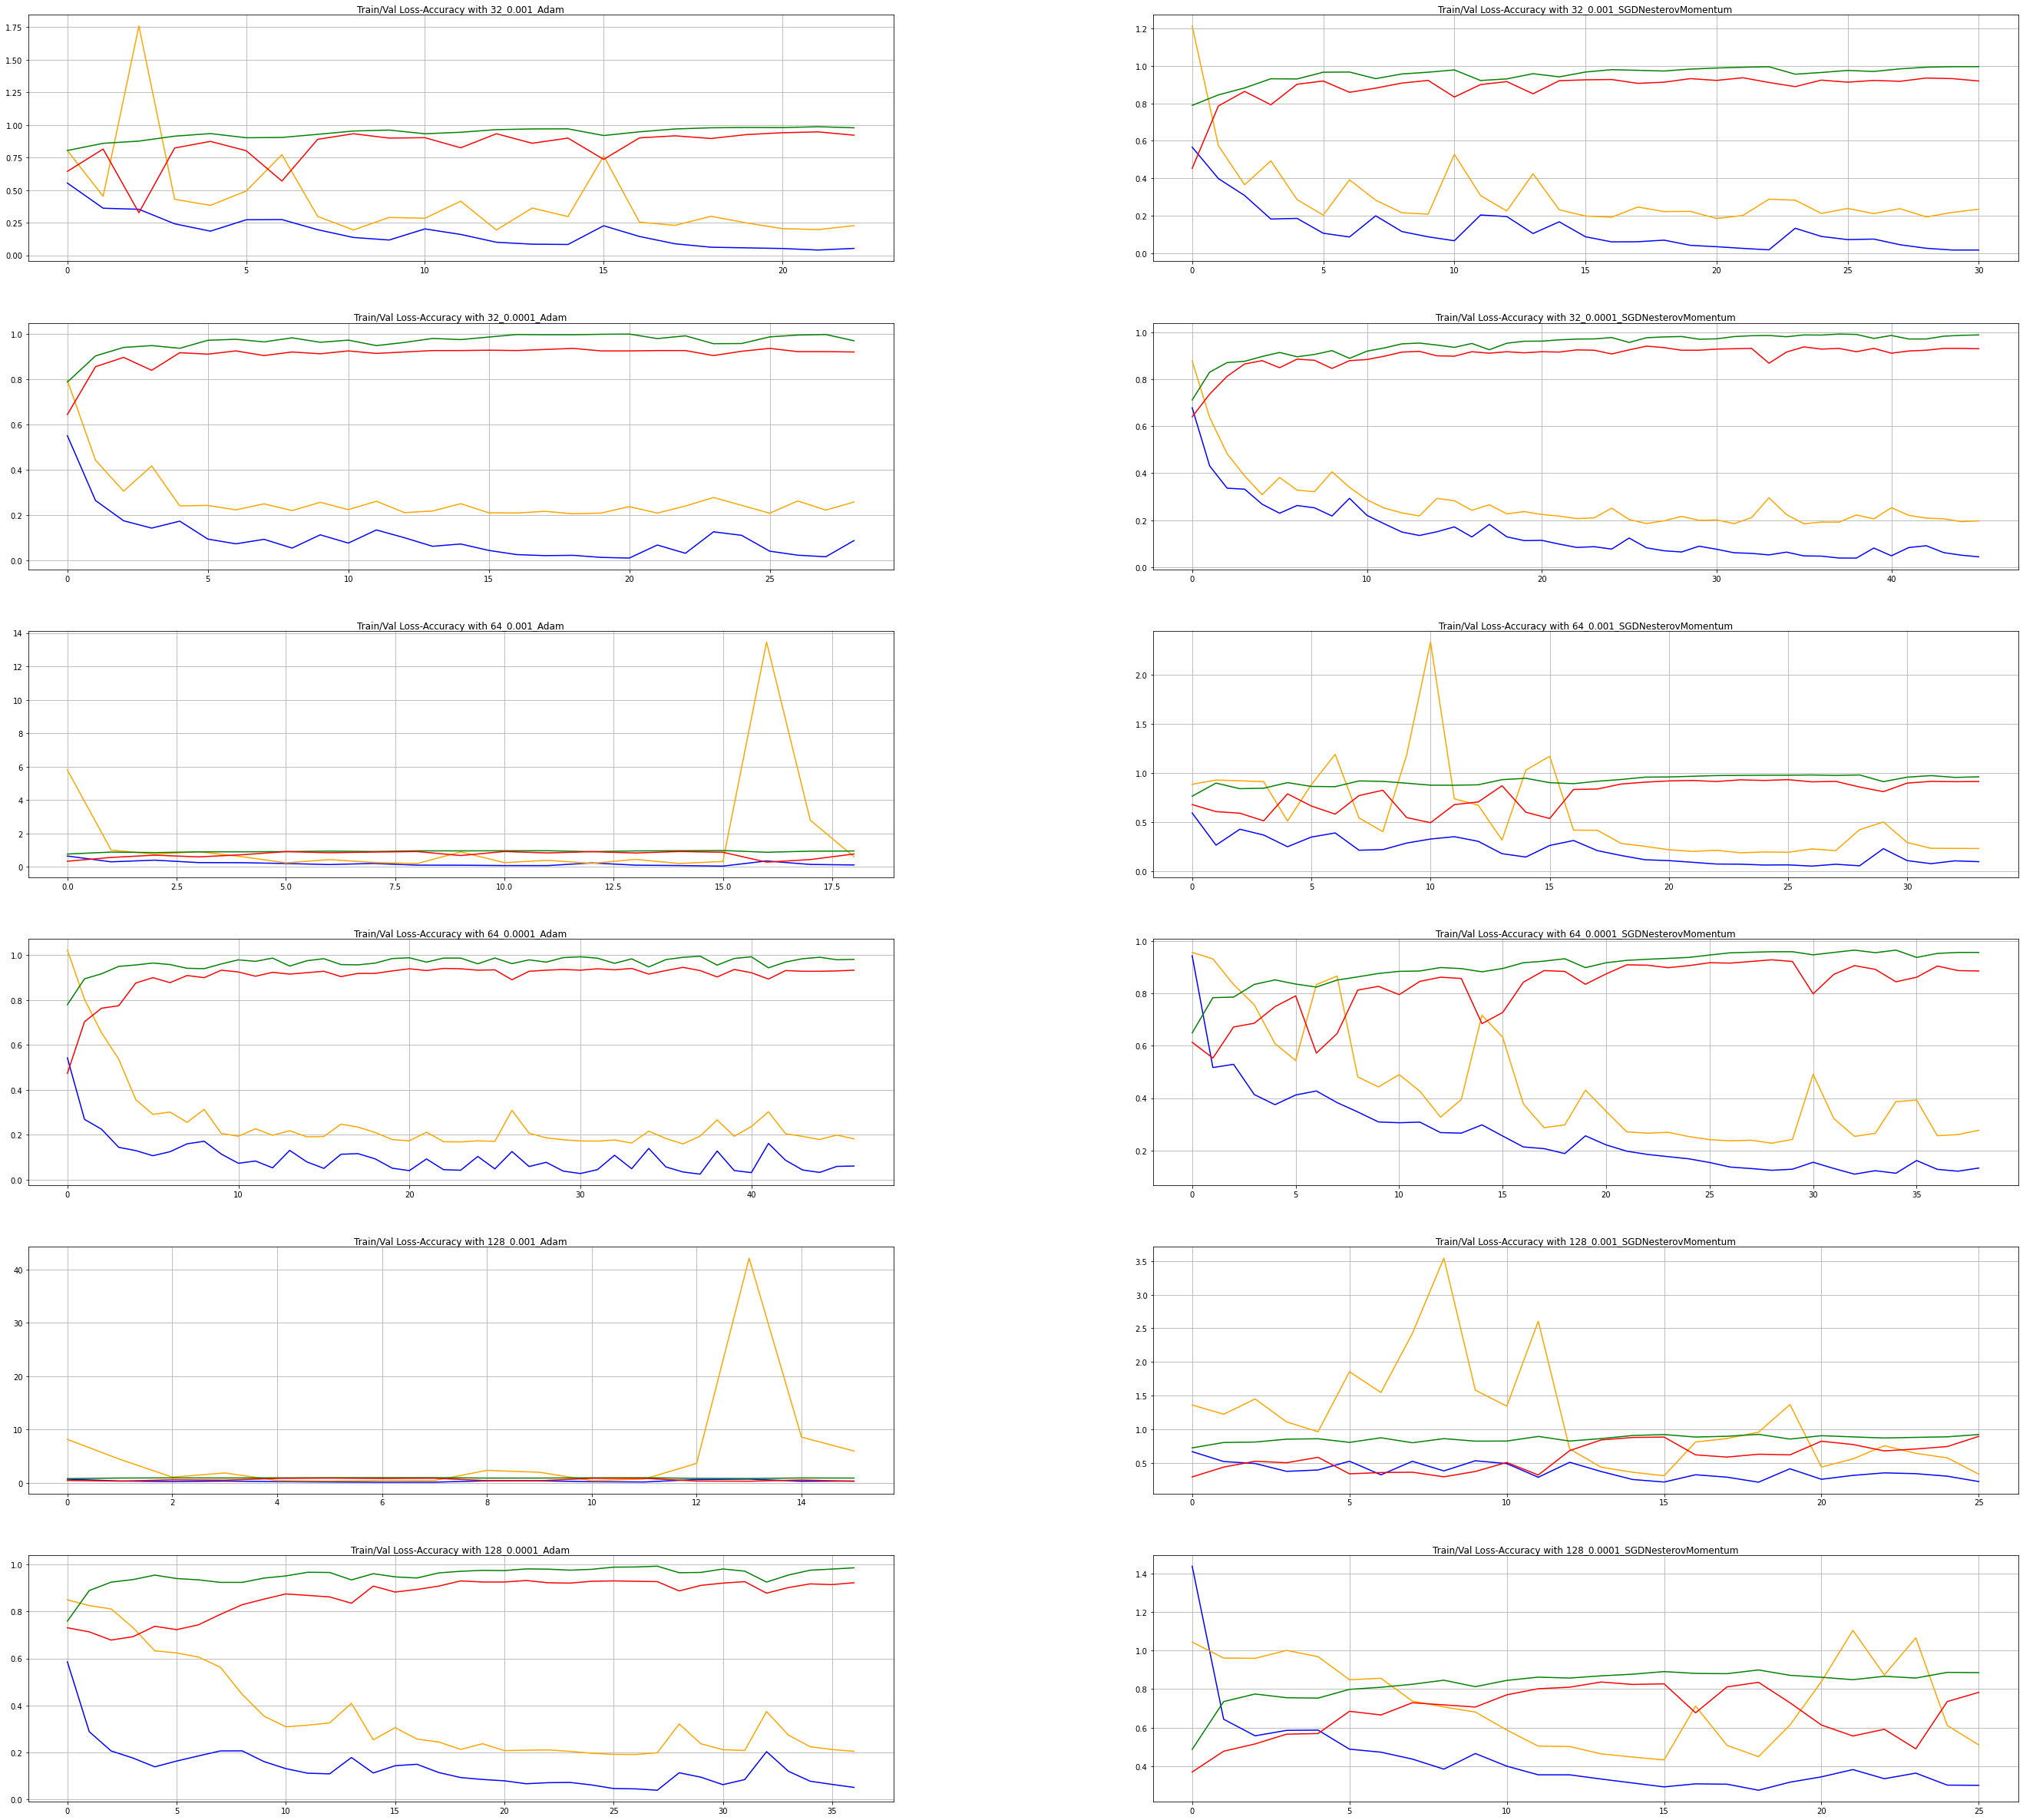

In [ ]:
EPS = 200     #Number of epochs for training 
plt.figure(figsize=(20,10))

dropout = 0.3
kernel_init = 'he_normal'
learning_rate = [0.001,0.0001]
Batch_size = [32,64,128]
optimizer_name = ['Adam','SGDNesterovMomentum']
result_score = []
index = 0
x = 0
for BS in Batch_size:
  for lrate in learning_rate:
    for i in range(2):
      score = []
      print ("{j}: batch size:{bs}_learning rate:{lr}_optimizer:{o}".
             format(j=index, bs=BS, lr=lrate,o=optimizer_name[i]))
      #Xoá đi mô hình cũ
      keras.backend.clear_session()
      model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(64, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(96, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(128, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(256, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(384, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(dropout),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Flatten(),
        layers.Dense(512, kernel_initializer=kernel_init, activation='relu'),
        layers.Dense(3, kernel_initializer=kernel_init, activation='softmax')
      ])

      if i == 0:
        opt = Adam(learning_rate=lrate)
      else:
        opt = SGD(learning_rate=lrate, momentum=0.9, nesterov=True)

      # biên dịch model
      print("[INFO] compiling model...")
      model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

      mc = callbacks.ModelCheckpoint('{j}_mask_detector_{bs}_{lr}_{op}.h5'.format(j=index,bs=BS, lr=lrate,op=optimizer_name[i]),
                                    monitor='val_accuracy', 
                                    mode='max', verbose=1, 
                                    save_best_only=True)
      es = callbacks.EarlyStopping(monitor ="val_loss", 
                                    mode ="min", verbose=1,  patience = 10, 
                                    restore_best_weights = True)

      # huấn luyện fc
      print("[INFO] training head...")
      H = model.fit(
            train_images, train_labels, batch_size=BS,
            validation_data=(validation_images, validation_labels),
            epochs=EPS, callbacks =[mc,es])

      model = load_model('{j}_mask_detector_{bs}_{lr}_{op}.h5'.format(j=index,bs=BS, lr=lrate,op=optimizer_name[i]))

      print ("score validation set:")
      validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
      print ("score training set:")
      train_loss, train_acc = model.evaluate(train_images,  train_labels)

      score.append(train_loss)
      score.append(train_acc)
      score.append(validation_loss)
      score.append(validation_acc)
      result_score.append(score)

      x += 1
      if i == 0:
        plt.subplot(7, 2, x)
        plt.plot(H.history["loss"], 'blue', label="train_loss")
        plt.plot(H.history["val_loss"], 'orange',label="val_loss")
        plt.plot(H.history["accuracy"], 'green', label="train_acc")
        plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
        plt.title('Train/Val Loss-Accuracy with {bs}_{lr}_{op}'.format(bs=BS, 
                                                                           lr=lrate,
                                                                           op=optimizer_name[i]), pad=-50)
        plt.grid(True)
     
      if i == 1:
        plt.subplot(7, 2, x)
        plt.plot(H.history["loss"], 'blue', label="train_loss")
        plt.plot(H.history["val_loss"], 'orange',label="val_loss")
        plt.plot(H.history["accuracy"], 'green', label="train_acc")
        plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
        plt.title('Train/Val Loss-Accuracy with {bs}_{lr}_{op}'.format(bs=BS, 
                                                                      lr=lrate,
                                                                      op=optimizer_name[i]), pad=-50)

        plt.grid(True)
      
      index += 1
      print ("\n========================================\n")

df2 = pd.DataFrame(np.array(result_score),
                   columns=['train loss', 'train accuracy', 'val loss', 'val accuracy'])

plt.subplots_adjust(top=3.8, bottom=0.01, left=0.05, right=1.25, hspace=0.25,wspace=0.30)
plt.savefig("plot_turning_hyperparemater.png")
plt.show()

In [ ]:
df2.to_csv('/content/compare_hyperparemeter.csv')
df2

,train loss,train accuracy,val loss,val accuracy
0,0.023025,0.993888,0.197048,0.946117
1,0.021526,0.998642,0.201559,0.936609
2,0.009114,1.000000,0.205516,0.935024
3,0.057814,0.996604,0.185432,0.941363
4,0.127085,0.954499,0.257766,0.923930
5,0.058843,0.989813,0.195225,0.933439
6,0.023252,0.999660,0.158699,0.946117
7,0.118340,0.974873,0.227705,0.928685
8,0.277560,0.889983,0.334855,0.868463
9,0.285258,0.913413,0.331349,0.892235


##**7. Code Sử dụng Data Augmentation**

0: batch size:64_learning rate:0.0001_optimizer:Adam
[INFO] compiling model...
[INFO] training head...
Epoch 1/200
47/47 [==============================] - 34s 709ms/step - loss: 0.8721 - accuracy: 0.6934 - val_loss: 0.9242 - val_accuracy: 0.5024

Epoch 00001: val_accuracy improved from -inf to 0.50238, saving model to 0_mask_detector_64_0.0001_Adam.h5
Epoch 2/200
47/47 [==============================] - 33s 705ms/step - loss: 0.5144 - accuracy: 0.7881 - val_loss: 0.7856 - val_accuracy: 0.6719

Epoch 00002: val_accuracy improved from 0.50238 to 0.67195, saving model to 0_mask_detector_64_0.0001_Adam.h5
Epoch 3/200
47/47 [==============================] - 32s 688ms/step - loss: 0.4578 - accuracy: 0.8136 - val_loss: 0.7075 - val_accuracy: 0.6751

Epoch 00003: val_accuracy improved from 0.67195 to 0.67512, saving model to 0_mask_detector_64_0.0001_Adam.h5
Epoch 4/200
47/47 [==============================] - 31s 664ms/step - loss: 0.4442 - accuracy: 0.8177 - val_loss: 0.5936 - val_accuracy

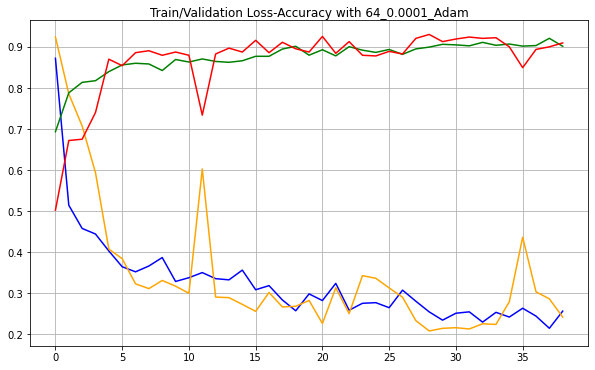



1: batch size:32_learning rate:0.0001_optimizer:SGDNesterovMomentum
[INFO] compiling model...
[INFO] training head...
Epoch 1/200
93/93 [==============================] - 33s 343ms/step - loss: 0.7870 - accuracy: 0.6533 - val_loss: 0.9097 - val_accuracy: 0.6086

Epoch 00001: val_accuracy improved from -inf to 0.60856, saving model to 1_mask_detector_32_0.0001_SGDNesterovMomentum.h5
Epoch 2/200
93/93 [==============================] - 33s 355ms/step - loss: 0.6531 - accuracy: 0.7277 - val_loss: 0.7436 - val_accuracy: 0.6846

Epoch 00002: val_accuracy improved from 0.60856 to 0.68463, saving model to 1_mask_detector_32_0.0001_SGDNesterovMomentum.h5
Epoch 3/200
93/93 [==============================] - 34s 362ms/step - loss: 0.5778 - accuracy: 0.7623 - val_loss: 0.5941 - val_accuracy: 0.7591

Epoch 00003: val_accuracy improved from 0.68463 to 0.75911, saving model to 1_mask_detector_32_0.0001_SGDNesterovMomentum.h5
Epoch 4/200
93/93 [==============================] - 34s 367ms/step - los

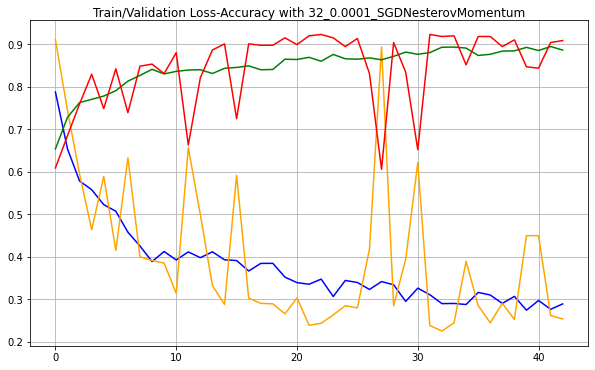

In [ ]:
EPS = 200     #Number of epochs for training 
hyperparameter_1 = ['he_normal', 0.3, 64, 0.0001, 'Adam']
hyperparameter_2 = ['he_normal', 0.3, 32, 0.0001, 'SGDNesterovMomentum']
hyperparameter = [hyperparameter_1, hyperparameter_2]
result_score = []
index = 0
x = 1
for param in hyperparameter:
  score = []
  kernel_init = param[0]
  dropout = param[1]
  BS = param[2]
  lrate = param[3]
  opt = param[4]

  print ("{j}: batch size:{bs}_learning rate:{lr}_optimizer:{o}".
             format(j=index, bs=BS, lr=lrate, o=opt))
      
  #Xoá đi mô hình cũ
  keras.backend.clear_session()
  model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3),input_shape=(224,224,3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(64, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(96, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(128, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        
        layers.Conv2D(256, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Conv2D(384, kernel_size=(3, 3)),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(dropout),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),

        layers.Flatten(),
        layers.Dense(512, kernel_initializer=kernel_init, activation='relu'),
        layers.Dense(3, kernel_initializer=kernel_init, activation='softmax')
  ])

  # construct the training image generator for data augmentation
  aug = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.15,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.15,
            horizontal_flip=True,
            fill_mode="nearest")

  if opt == 'Adam':
    optimizer = Adam(learning_rate=lrate)
  elif opt == 'SGDNesterovMomentum':
    optimizer = SGD(learning_rate=lrate, momentum=0.9, nesterov=True)

  # biên dịch model
  print("[INFO] compiling model...")
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

  es = callbacks.EarlyStopping(monitor ="val_loss", 
                                    mode ="min", verbose=1,  patience = 10, 
                                    restore_best_weights = True)
  mc = callbacks.ModelCheckpoint('{j}_mask_detector_{bs}_{lr}_{op}.h5'.format(j=index,bs=BS,lr=lrate,op=opt),
                                    monitor='val_accuracy', 
                                    mode='max', verbose=1, 
                                    save_best_only=True)
  
  # huấn luyện fc
  print("[INFO] training head...")
  H = model.fit(
            aug.flow(train_images, train_labels, batch_size=BS),
            validation_data=(validation_images, validation_labels),
            epochs=EPS, callbacks = [es, mc])
  

  model = load_model('{j}_mask_detector_{bs}_{lr}_{op}.h5'.format(j=index,bs=BS,lr=lrate,op=opt))

  print ("score validation set:")
  validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
  print ("score training set:")
  train_loss, train_acc = model.evaluate(train_images,  train_labels)

  score.append(round(train_loss,4))
  score.append(round(train_acc,s))
  score.append(round(validation_loss,4))
  score.append(round(validation_acc,4))
  result_score.append(score)
  
  plt.figure(figsize=(10,6))
  plt.plot(H.history["loss"], 'blue', label="train_loss")
  plt.plot(H.history["val_loss"], 'orange',label="val_loss")
  plt.plot(H.history["accuracy"], 'green', label="train_acc")
  plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
  plt.title('Train/Validation Loss-Accuracy with {bs}_{lr}_{op}'.format(bs=BS, lr=lrate,op=opt), pad=-50)
  plt.grid(True)
  plt.show()

  index += 1
  x += 1
  print ("\n========================================\n")

  df2_score = pd.DataFrame(np.array(result_score),
                   columns=['train loss', 'train accuracy', 'val loss', 'val accuracy'])

In [ ]:
df2_score = pd.DataFrame(np.array(result_score),
                   columns=['train loss', 'train accuracy', 'val loss', 'val accuracy'])
df2_score

,train loss,train accuracy,val loss,val accuracy
0,0.1638,0.9426,0.2080,0.9303
1,0.2173,0.9256,0.2434,0.9223


#**IX. THAM KHẢO**

[1]:	J. Brownlee, “A Gentle Introduction to Dropout for Regularizing Deep Neural Networks”, Machine Learning Mastery, tháng 12 02, 2018. https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ (truy cập tháng 7 18, 2021).

[2]:	S. Ramesh, “A guide to an efficient way to build neural network architectures- Part II: Hyper-parameter…”, Medium, tháng 7 15, 2021. https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7 (truy cập tháng 7 18, 2021).

[3]:	S. Ramesh, “A guide to an efficient way to build neural network architectures- Part I: Hyper-parameter…”, Medium, tháng 7 15, 2021. https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b (truy cập tháng 7 18, 2021).

[4]:	M. Riva, “Batch Normalization in Convolutional Neural Networks | Baeldung on Computer Science”, tháng 10 29, 2020. https://www.baeldung.com/cs/batch-normalization-cnn (truy cập tháng 7 18, 2021).

[5]:	“Common architectures in convolutional neural networks.”, Jeremy Jordan, tháng 4 20, 2018. https://www.jeremyjordan.me/convnet-architectures/ (truy cập tháng 7 18, 2021).

[6]	“CS231n Convolutional Neural Networks for Visual Recognition”. https://cs231n.github.io/convolutional-networks/ (truy cập tháng 7 18, 2021).

[7]:	J. Brownlee, “How to Choose Loss Functions When Training Deep Learning Neural Networks”, Machine Learning Mastery, tháng 1 29, 2019. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ (truy cập tháng 7 12, 2021).

[8]:	J. Brownlee, “How Do Convolutional Layers Work in Deep Learning Neural Networks?”, Machine Learning Mastery, tháng 4 16, 2019. https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ (truy cập tháng 7 18, 2021).

[9]:	J. Brownlee, “How to Grid Search Hyperparameters for Deep Learning Models in Python With Keras”, Machine Learning Mastery, tháng 8 08, 2016. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ (truy cập tháng 7 18, 2021).

[10]:	J. Brownlee, “How To Improve Deep Learning Performance”, Machine Learning Mastery, tháng 9 20, 2016. https://machinelearningmastery.com/improve-deep-learning-performance/ (truy cập tháng 7 18, 2021).

[11]:	A. Krizhevsky, I. Sutskever, và G. E. Hinton, “ImageNet classification with deep convolutional neural networks”, Commun. ACM, vol 60, số p.h 6, tr 84–90, tháng 5 2017, doi: 10.1145/3065386.

[12]:	“Keras ImageDataGenerator and Data Augmentation”, PyImageSearch, tháng 7 08, 2019. https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/ (truy cập tháng 7 18, 2021).

[13]:	F.-F. Li, J. Johnson, và S. Yeung, “Lecture 9: CNN Architectures”, tr 101.

[14]:	“MNIST: CNN, grid search, data augmentation”. https://kaggle.com/cedricb/mnist-cnn-grid-search-data-augmentation (truy cập tháng 7 18, 2021).

[15]:	J. Brownlee, “Use Early Stopping to Halt the Training of Neural Networks At the Right Time”, Machine Learning Mastery, tháng 12 09, 2018. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ (truy cập tháng 7 12, 2021).

[16]:	“Batch normalization in 3 levels of understanding | by Johann Huber | Towards Data Science”. https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338 (truy cập tháng 7 18, 2021).

[17]:	M. S. Researcher PhD, “Simple Guide to Hyperparameter Tuning in Neural Networks”, Medium, tháng 7 29, 2020. https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594 (truy cập tháng 7 20, 2021).

[18]:	P. Radhakrishnan, “What are Hyperparameters ? and How to tune the Hyperparameters in a Deep Neural Network?”, Medium, tháng 10 18, 2017. https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a (truy cập tháng 7 20, 2021).


